# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Task: Create a model to infer how the price of the car is determined based on the given features. 

Select the features that can explain/predict the price of teh car and quantify their relation with the car.  

Come up with recommendatiosn to the car dealer on what variables impact the car price

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from scipy.stats import linregress

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('data/vehicles.csv')
df.sample(10)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
405990,7305370735,moses lake,176,2011.0,gmc,terrain slt-2,excellent,6 cylinders,gas,150743.0,NaN,automatic,2CTFLXE54B6286982,4wd,NaN,SUV,NaN,wa
424001,7311268209,milwaukee,29990,2012.0,toyota,tacoma double cab pickup,good,6 cylinders,gas,43182.0,clean,other,3TMLU4EN4CM085701,4wd,NaN,pickup,white,wi
322974,7316713263,portland,225,2006.0,toyota,tundra sr5,NaN,8 cylinders,gas,158592.0,clean,automatic,5TBET34166S507128,rwd,NaN,NaN,NaN,or
169819,7307315071,wichita,0,2019.0,chevrolet,tahoe,excellent,8 cylinders,gas,33863.0,clean,automatic,1GNSKCKJ4KR198601,4wd,full-size,SUV,NaN,ks
310280,7304779450,tulsa,0,2018.0,ford,expedition xlt suv,excellent,NaN,gas,26596.0,clean,automatic,1FMJU1HT8JEA53753,rwd,NaN,SUV,NaN,ok
59948,7313459140,santa maria,0,2016.0,toyota,tacoma access cab,NaN,NaN,gas,94990.0,clean,automatic,5TFRX5GN4GX055229,fwd,full-size,truck,white,ca
158250,7307536423,des moines,28900,2003.0,ford,f-550,NaN,NaN,diesel,86000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ia
415099,7314919047,appleton-oshkosh-FDL,14500,2018.0,kia,soul,like new,4 cylinders,gas,62686.0,clean,automatic,NaN,fwd,compact,hatchback,green,wi
338099,7306556167,pittsburgh,6300,2012.0,ford,fusion,like new,6 cylinders,gas,99850.0,clean,automatic,NaN,fwd,mid-size,sedan,white,pa
5513,7314654862,anchorage / mat-su,31900,2019.0,kia,sportage,NaN,4 cylinders,gas,23643.0,clean,other,KNDPRCA62K7506982,4wd,NaN,SUV,silver,ak


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [12]:
# Dropping id 
df.drop(columns = ['id'], inplace = True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [13]:
## Getting counts and percentages of missing values for each column
df.isna().sum()
df.isna().mean().round(2).multiply(100).sort_values(ascending= False)
 

size            72.0
cylinders       42.0
condition       41.0
VIN             38.0
paint_color     31.0
drive           31.0
type            22.0
manufacturer     4.0
title_status     2.0
odometer         1.0
model            1.0
fuel             1.0
transmission     1.0
region           0.0
price            0.0
year             0.0
state            0.0
dtype: float64

#### The variables size, cylinder, condition, drive, paint_color have the following percentage of missing values respectively:  $72,42,41, 31, 31 \%$.

In [15]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.03,12182282.17,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.24,9.45,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.33,213881.5,0.0,37704.0,85548.0,133542.5,10000000.0
title_status,418638,6,clean,405117,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Insights:
- The max price is 3.7*10^9 or 3.7 billion dollars. This is likely an error. 
- The 75th percentile is 26K, but some unusual outliers inflate the standard deviation of $1.2*10^6.
- The price is exceptionally right-skewed.
-  Need to drop unusually high prices of vintage or classic cars and focus on vehicles within the typical range.
- The 'model' variable has over 29K levels, and using it will complicate the analysis by creating thousands of dummy variables; it can be better explored with an ANOVA analysis to compare prices per model or identify the most and least profitable models. I will skip it for now. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

#### VIN should be a unique identifier for each car. Need to check if this is the case and remove duplicates if any. 

In [20]:
df['VIN'].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
JTHCF5C25A5041393      1
SAJGX2749VCOO8376      1
Name: count, Length: 118246, dtype: int64

In [21]:
## Exploring cars with the same VIN to understand what's happening.
df[df['VIN']=='1FMJU1JT1HEA52352']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
76,auburn,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
707,birmingham,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
1935,dothan,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
2201,florence / muscle shoals,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
2377,gadsden-anniston,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420611,madison,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
423786,milwaukee,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
425368,sheboygan,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
425834,wausau,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi


These seem to be duplicates except for differnt regions and state. Possibly the same car was listed online in different states and regions. I will drop the duplicates before I proceed. 

#### Removing entries with duplicate VIN

In [24]:
df['VIN'].nunique()

118246

 Only 118246 of the 426880 entries have uniqe VIN

In [26]:
# Create a new column that counts the number of missing values in each row
df['missing_count'] = df.isnull().sum(axis=1)

# Sort the DataFrame by VIN and missing_count
df.sort_values(by=['VIN', 'missing_count'], inplace=True)

# Drop duplicates, keeping the first occurrence (which has the least missing values)
df.drop_duplicates(subset='VIN', keep='first', inplace=True)

# Drop the 'missing_count' column
df.drop(columns='missing_count', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118247 entries, 253158 to 31
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        118247 non-null  object 
 1   price         118247 non-null  int64  
 2   year          117654 non-null  float64
 3   manufacturer  115204 non-null  object 
 4   model         117561 non-null  object 
 5   condition     61262 non-null   object 
 6   cylinders     70589 non-null   object 
 7   fuel          116653 non-null  object 
 8   odometer      116754 non-null  float64
 9   title_status  114740 non-null  object 
 10  transmission  117076 non-null  object 
 11  VIN           118246 non-null  object 
 12  drive         91042 non-null   object 
 13  size          30508 non-null   object 
 14  type          102275 non-null  object 
 15  paint_color   87721 non-null   object 
 16  state         118247 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 16

### Exploring the Distribution of Missing Values

Text(0.5, 1.0, 'Distribution of Missing Values')

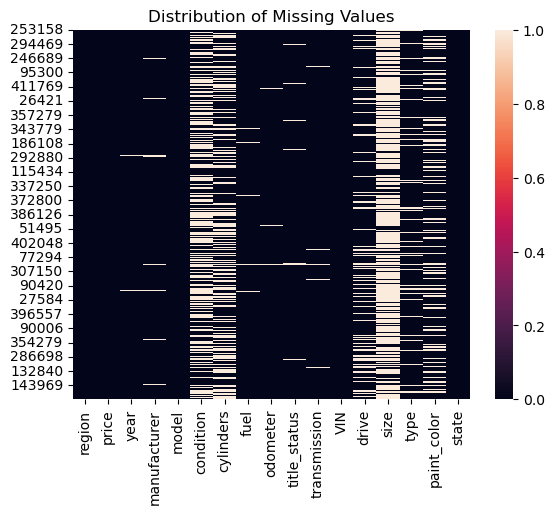

In [29]:
sns.heatmap(df.isna());
plt.title("Distribution of Missing Values") 

#### Insight:
The variable size has too many missing values, the info contained in this variable might be redundant as the size depends on the model, manufacturer and cylinder. I will drop the size variable,  

In [31]:
df.drop(columns = ['size'], inplace = True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
253158,north jersey,12500,1967.0,NaN,1967 MG Midget,good,4 cylinders,gas,0.0,missing,manual,0,rwd,convertible,red,nj
180346,maine,0,2014.0,ford,edge limited,NaN,NaN,gas,117798.0,clean,automatic,00000000000A26444,NaN,NaN,NaN,me
178309,maine,0,2017.0,ford,explorer xlt awd,excellent,6 cylinders,gas,90655.0,clean,automatic,00000000000A35665,4wd,SUV,black,me
178025,maine,0,2019.0,ford,escape,NaN,NaN,gas,82970.0,clean,automatic,00000000000A42482,fwd,NaN,NaN,me
179279,maine,0,2015.0,ford,f150,NaN,NaN,gas,46455.0,clean,automatic,00000000000A44554,NaN,NaN,NaN,me


### Exploring the price variable

Text(0.5, 1.0, 'Boxplot of the Car Price shows skewness & outliers')

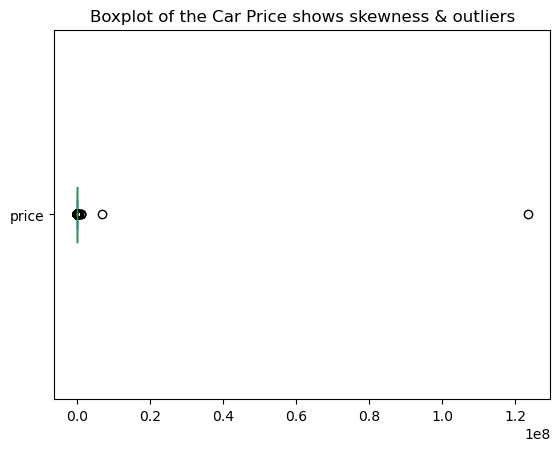

In [33]:
df["price"].plot(kind = "box", vert = False);
plt.title("Boxplot of the Car Price shows skewness & outliers") 

### Interpretation: 
The boxplot shows too many outliers on the right; if we want to focus on a typical car's price and ignore that of classics or collectibles, we must trim some unusually high values. 

Text(0.5, 1.0, 'KDE of the Car Price shows skewness & outliers')

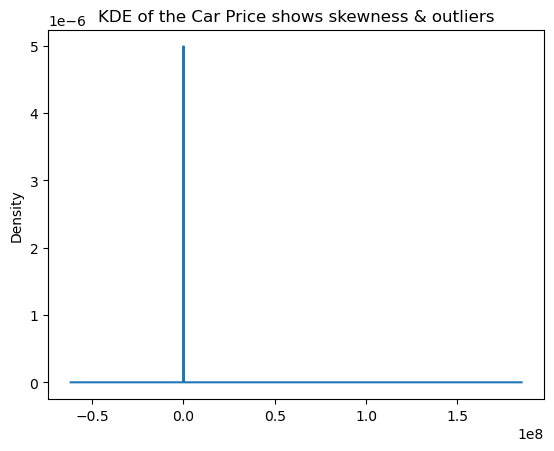

In [35]:
df["price"].plot(kind = "kde")
plt.title("KDE of the Car Price shows skewness & outliers") 

#### Insight: 
- The density curve is distorted and condensed around zero, likely due to unusually high values in the right tail and extreme skewness. 
- I will drop those and retry. 

Text(0.5, 1.0, 'Histogram of the Car Price shows skewness & outliers')

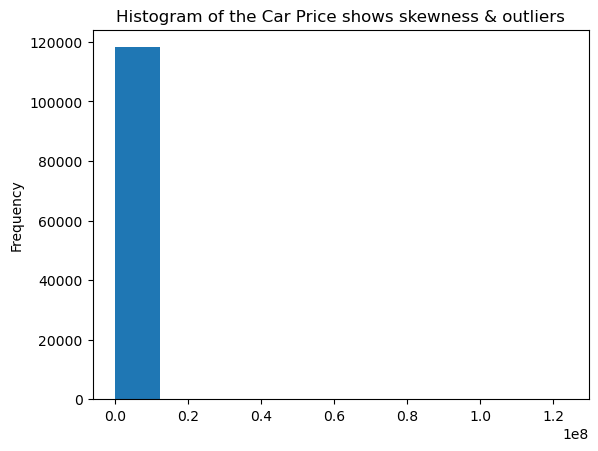

In [37]:
df["price"].plot(kind = "hist")
plt.title("Histogram of the Car Price shows skewness & outliers") 

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset before modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Dropping outliers with unusually high prices. 

In [40]:
# Exploring the percentiles of variable price:
df.describe([0.25,0.75, 0.90, 0.95, 0.99, .999, .9999]).round(0)

,price,year,odometer
count,118247.0,117654.0,116754.0
mean,17827.0,2013.0,90140.0
std,359912.0,7.0,96650.0
min,0.0,1903.0,0.0
25%,6000.0,2010.0,40224.0
50%,13249.0,2014.0,84423.0
75%,23988.0,2017.0,126681.0
90%,35989.0,2019.0,166485.0
95%,43999.0,2020.0,191941.0
99%,67999.0,2020.0,249825.0


### Insights: 
- The price variable has Q1= 6000 and Q3= 23988
- Only 1% of the observations has price above 67999 dollars. 
- We can either drop the outliers or apply a log transformation to the price to accomodate the long tail in the distribution. 
- Explore the top 1% of the data

In [42]:
# Explore cars with price above 67999 (the 90th percentile) 
df_top10_percent = df.query("price > 67999").copy()
df_top10_percent.info()
df_top10_percent.sample(30) ## print a sample of size 30


<class 'pandas.core.frame.DataFrame'>
Index: 1178 entries, 349796 to 9080
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1178 non-null   object 
 1   price         1178 non-null   int64  
 2   year          1131 non-null   float64
 3   manufacturer  1051 non-null   object 
 4   model         1160 non-null   object 
 5   condition     370 non-null    object 
 6   cylinders     611 non-null    object 
 7   fuel          1161 non-null   object 
 8   odometer      1177 non-null   float64
 9   title_status  1151 non-null   object 
 10  transmission  1164 non-null   object 
 11  VIN           1178 non-null   object 
 12  drive         961 non-null    object 
 13  type          985 non-null    object 
 14  paint_color   903 non-null    object 
 15  state         1178 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 156.5+ KB


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
45878,palm springs,93700,2020.0,mercedes-benz,s 560,excellent,8 cylinders,gas,11747.0,clean,automatic,WDDUG8DB7LA508395,NaN,other,NaN,ca
152320,indianapolis,143500,2006.0,NaN,PETERBILT 385 LONESTAR,excellent,6 cylinders,diesel,59000.0,clean,automatic,1NPGHU7X16D652847,rwd,truck,white,in
161311,omaha / council bluffs,82989,2015.0,mercedes-benz,g-class,NaN,8 cylinders,gas,60719.0,clean,automatic,WDCYC7DF8FX233748,NaN,SUV,silver,ia
21572,bakersfield,94995,2019.0,ford,f-250sd,NaN,NaN,diesel,15566.0,clean,automatic,1FT7W2BT7KED12158,4wd,NaN,black,ca
400203,bellingham,69999,2013.0,porsche,911 carrera,good,6 cylinders,gas,22496.0,clean,other,WP0CA2A90DS141213,rwd,convertible,NaN,wa
324019,portland,68500,1955.0,NaN,Belair 2 DR. Sedan,new,8 cylinders,gas,40.0,clean,automatic,1111111,rwd,sedan,custom,or
402976,kennewick-pasco-richland,74999,2019.0,ford,lifted f350 powerstroke,NaN,NaN,diesel,26036.0,clean,automatic,1FT8W3BTXKEG61003,4wd,truck,white,wa
10205,phoenix,69877,NaN,NaN,Super Duty F-250 SRW,NaN,8 cylinders,diesel,24465.0,NaN,automatic,1FT7W2BT7LEC92673,4wd,pickup,white,az
375792,houston,82900,2021.0,ford,super duty f-250,excellent,8 cylinders,diesel,5025.0,clean,automatic,1FT7W2BT0MEC56955,4wd,pickup,grey,tx
99625,jacksonville,73995,2020.0,chevrolet,2500 hd high country,NaN,8 cylinders,diesel,8409.0,clean,automatic,1GC4YREY0LF203484,4wd,NaN,black,fl


In [43]:
## getting more insights on the top 10% expensive cars
df_top10_percent.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,1178,196,seattle-tacoma,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1178.0,NaN,NaN,NaN,200142.06,3600350.45,68000.0,71981.25,77985.5,87995.0,123456789.0
year,1131.0,NaN,NaN,NaN,2015.48,11.77,1932.0,2017.0,2019.0,2020.0,2021.0
manufacturer,1051,25,ford,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,1160,573,corvette,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,370,4,excellent,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,611,8,8 cylinders,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,1161,5,diesel,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,1177.0,NaN,NaN,NaN,25929.85,44617.21,0.0,6554.0,16613.0,31794.0,640626.0
title_status,1151,4,clean,1138,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Insights: The top 10% expensive cars have the following attributes:
- There are 1178 cars in the top 10% price tier. The have teh following attributes: 
- region: The most frequent was	seattle-tacoma	
- price	at least  68000.0 on average (mean)  200142.06 dollars.
- year: vaired from 1932 to 2021.0, with a median of 2019.
- manufacturer:	ford	accounted for 352	of the 1178 cars making it the most popular manufacturer. 
- model:	corvette	accounted for 41	of the 1178 cars making it the most popular model. 
- condition:	excellent	accounted for 231	of the 1178 cars
- cylinders:	8 cylinders	accounted for  426	 
- fuel:	diesel	accounted for 532	
- odometer: Ranged from  0 (brand new cars) to 640626 with a mean of roughly 26,000.
- title_status:	clean	accounted for 1138	of the most expensive cars. 
- transmission	automatic	accounted for 1048	of the most expensive cars. 
- drive	961	3	4wd	accounted for 772	of the most expensive cars. 
- type	985	12	pickup	accounted for 274	of the most expensive cars. 
- paint_color	903	12	white	accounted for 297	of the most expensive cars. 
- state: california accounted for 148 of the most expensive cars.

 - Summary for car sellers:
 - Aim for Ford and corvette in excellent condition with automatic transmission and clean title to get the best price for your cars.
 - Californai has the most expensive cars, and diesel was the most popular fuel among those.
 - A mileage arond 26,000 is ideal for used cars. 
                         
   

In [45]:
## compute teh upper outlier cuttoff point
Q1 = 6000
Q3 = 23988
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR

print(f"Upper Outlier Threshold: {upper_threshold}")

Upper Outlier Threshold: 50970.0


#### We can drop prices above the 99th percentile of  67999 or go further and drop entries above teh UOT of 50,970 if the distribution looks too irregular still. 

Similarly, there are cars with price near zero, we might need to drop out unusually cheap cars. 

In [48]:
df.describe([0.005,0.05, 0.01, 0.10, 0.12,0.15, .20, .25]).round(0)

,price,year,odometer
count,118247.0,117654.0,116754.0
mean,17827.0,2013.0,90140.0
std,359912.0,7.0,96650.0
min,0.0,1903.0,0.0
0.5%,0.0,1973.0,0.0
1%,0.0,1988.0,4.0
5%,0.0,2003.0,8674.0
10%,0.0,2005.0,18200.0
12%,266.0,2006.0,21265.0
15%,2200.0,2007.0,25731.0


In [49]:
## We can drop cars with prices below 2200 (the 15th percentile) or above the upper outlier threshold 50,970  
## cars less than 2200 are likely being sold for their parts or in bad shape
df = df.query("price >= 2200").query("price <=  67999").copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99366 entries, 253158 to 31
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        99366 non-null  object 
 1   price         99366 non-null  int64  
 2   year          98837 non-null  float64
 3   manufacturer  96715 non-null  object 
 4   model         98891 non-null  object 
 5   condition     54724 non-null  object 
 6   cylinders     60431 non-null  object 
 7   fuel          98052 non-null  object 
 8   odometer      98855 non-null  float64
 9   title_status  96723 non-null  object 
 10  transmission  98543 non-null  object 
 11  VIN           99365 non-null  object 
 12  drive         77164 non-null  object 
 13  type          86197 non-null  object 
 14  paint_color   77154 non-null  object 
 15  state         99366 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 12.9+ MB


Text(0.5, 1.0, 'The box-plot of the Car Price is Right Skewed')

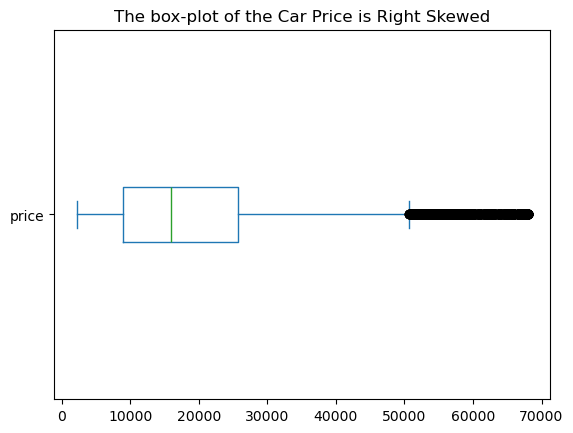

In [50]:
df["price"].plot(kind = "box", vert = False);
plt.title("The box-plot of the Car Price is Right Skewed")

Text(0.5, 1.0, 'The histogram of the Car Price is Right Skewed')

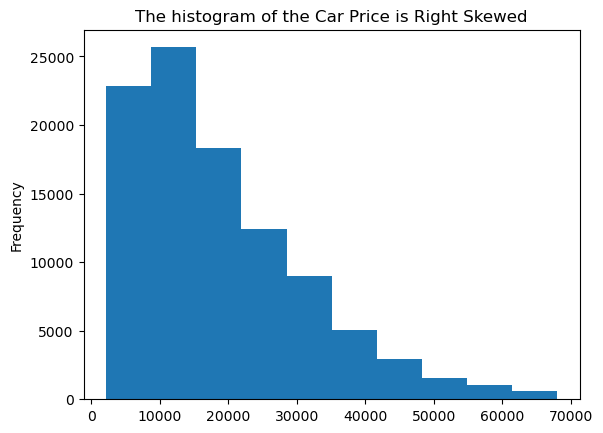

In [51]:

df["price"].plot(kind = "hist");
plt.title("The histogram of the Car Price is Right Skewed")

#### Interpretation: 
This boxplot looks more reasonable. I chose to keep more of the outliers on the RHS because they are likely associated with a higher profit margin, making them more valuable for the dealer. The data is still skewed right after the most expensive 10% of the cars are removed. We can trim more outliers and focus on modeling the typical car price. I want to explore the top 10% of teh cars and identify the upper outlier threshold. 

## EDA

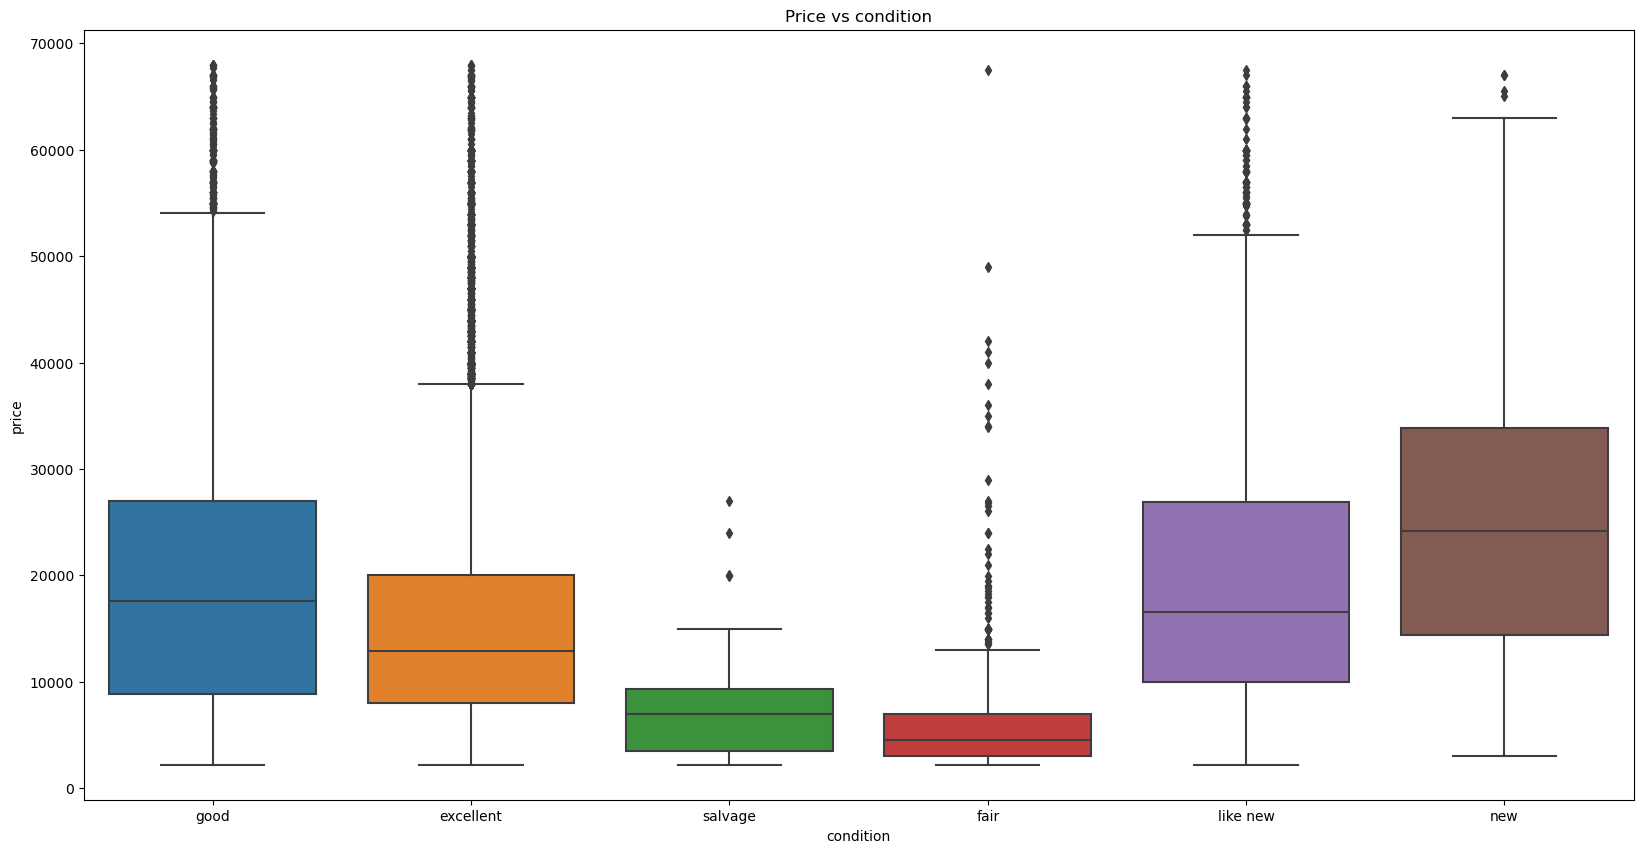

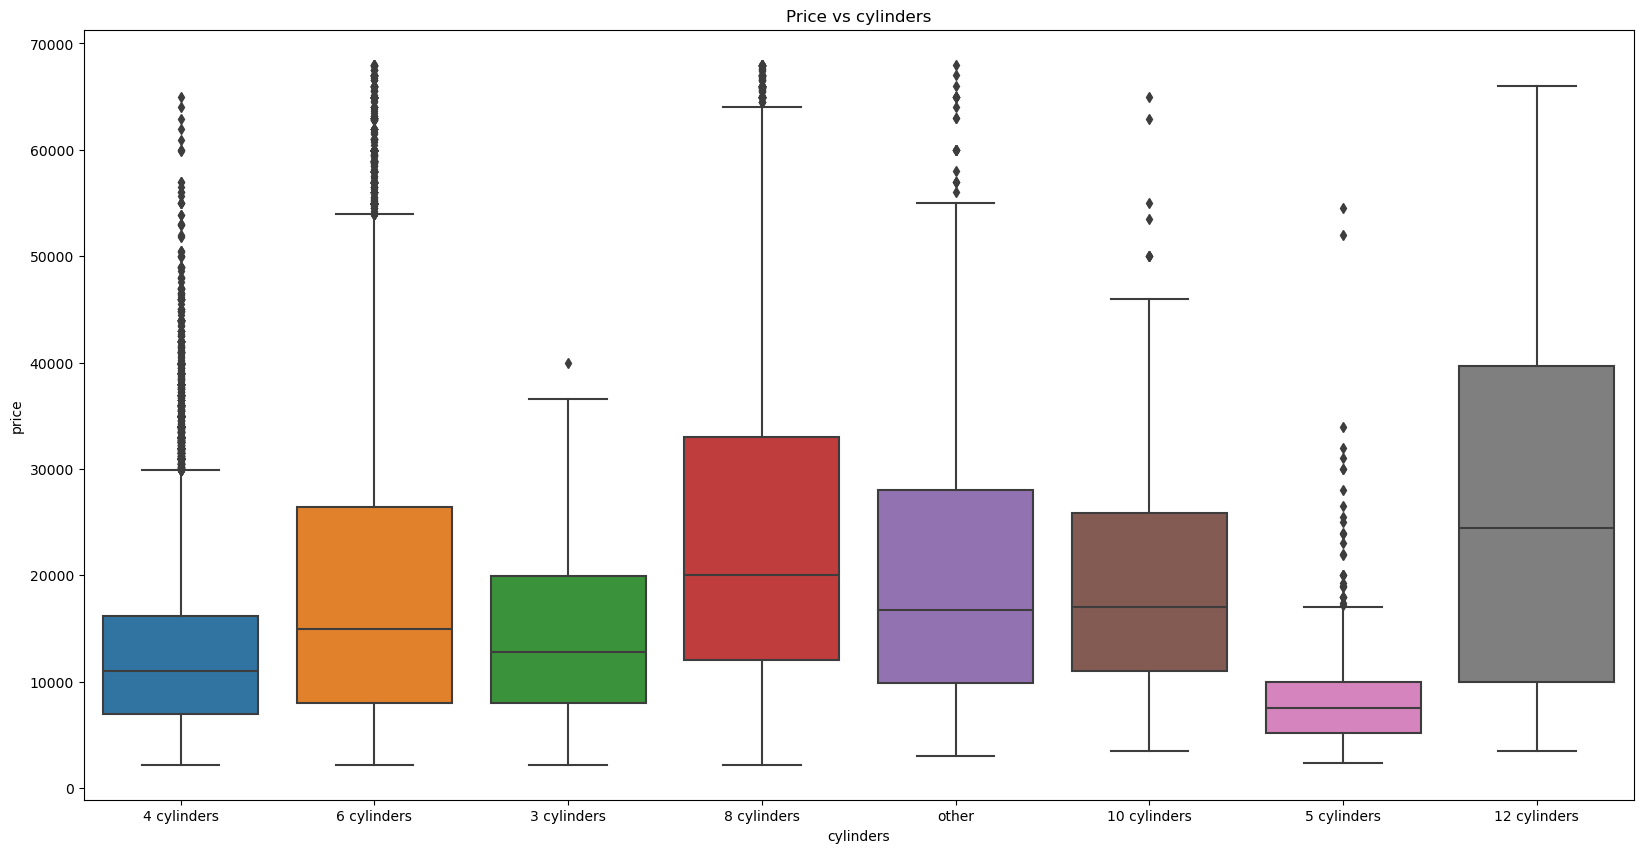

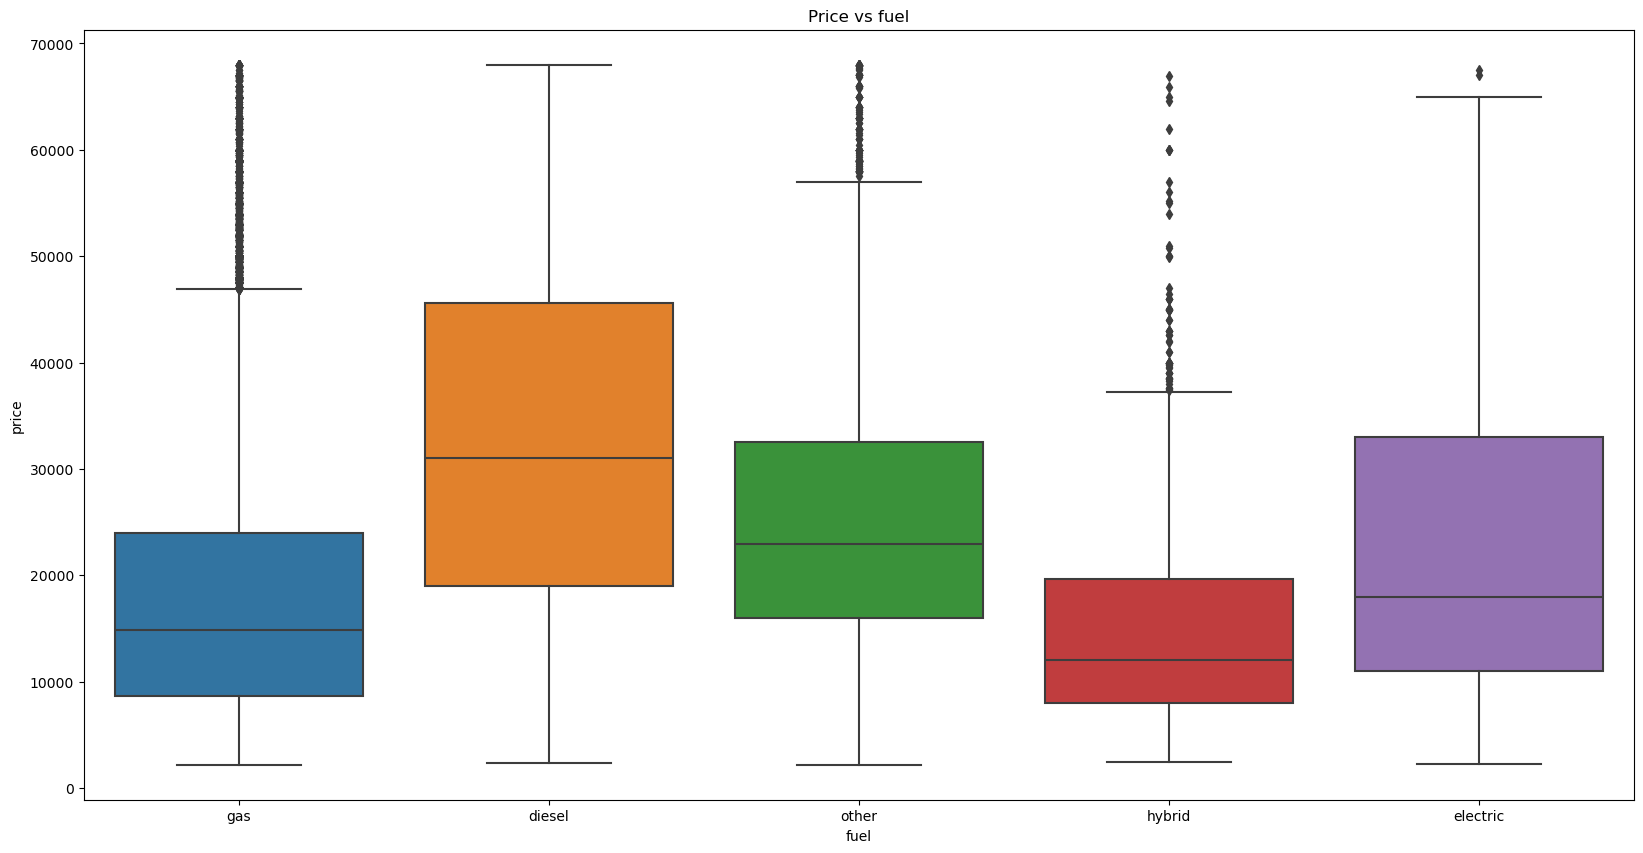

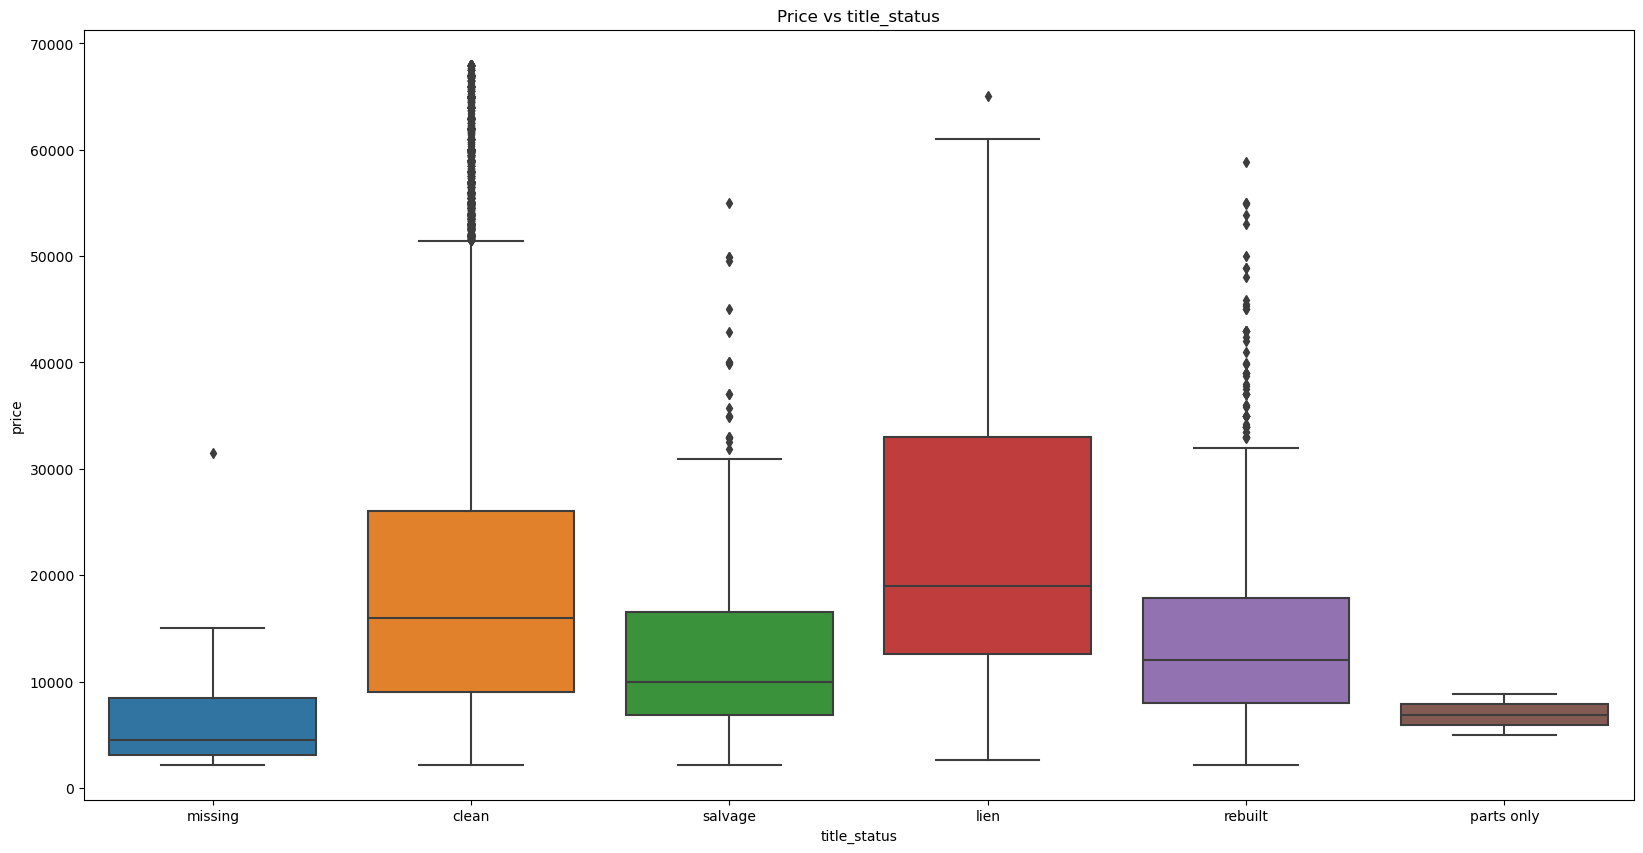

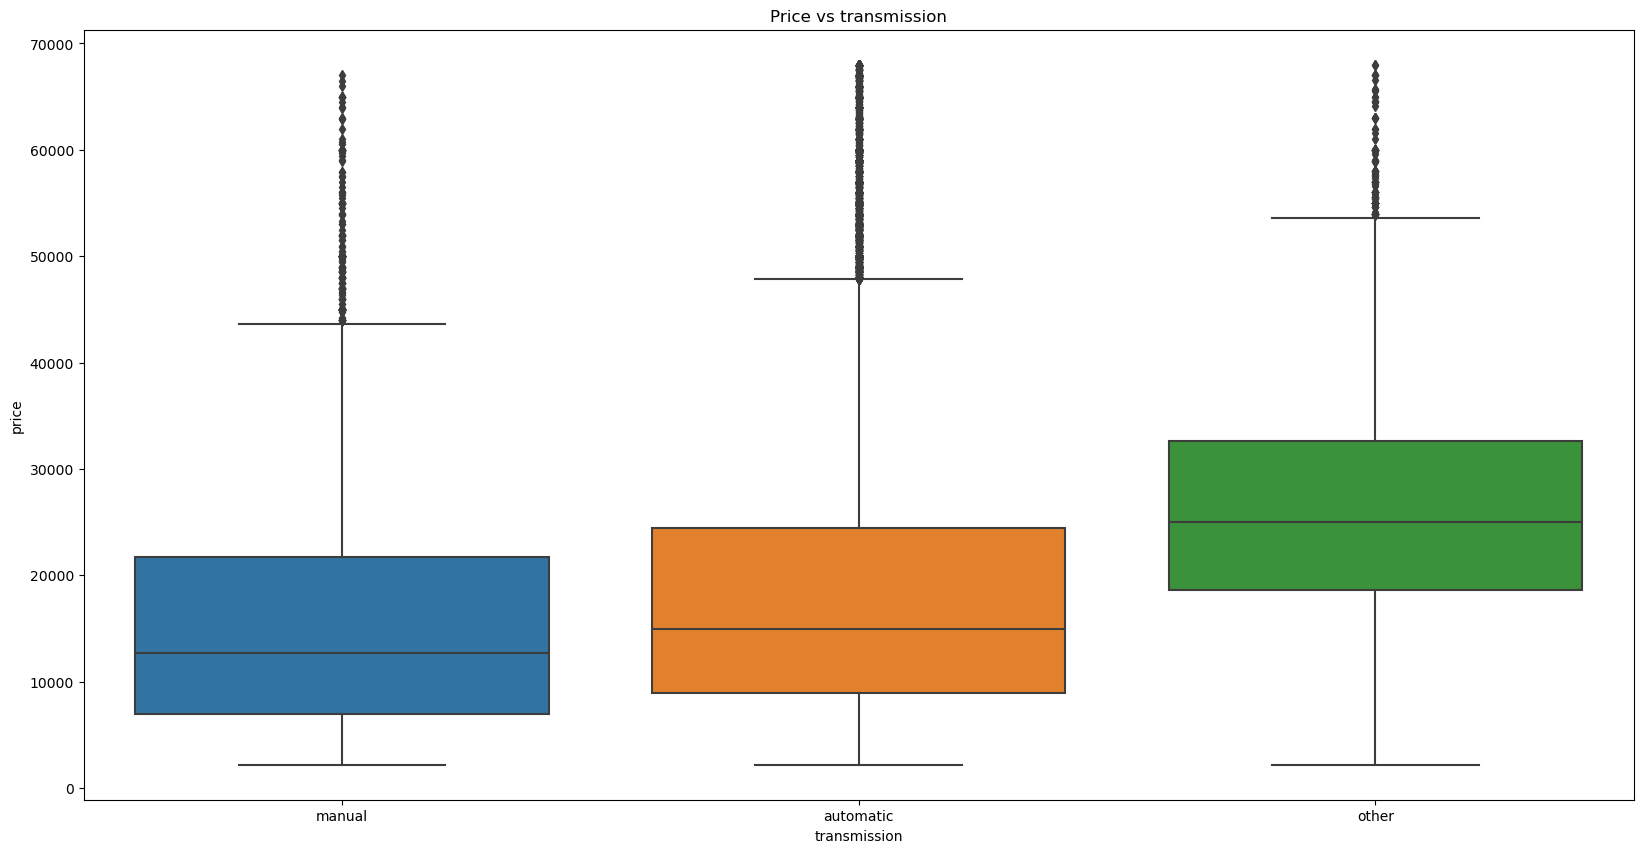

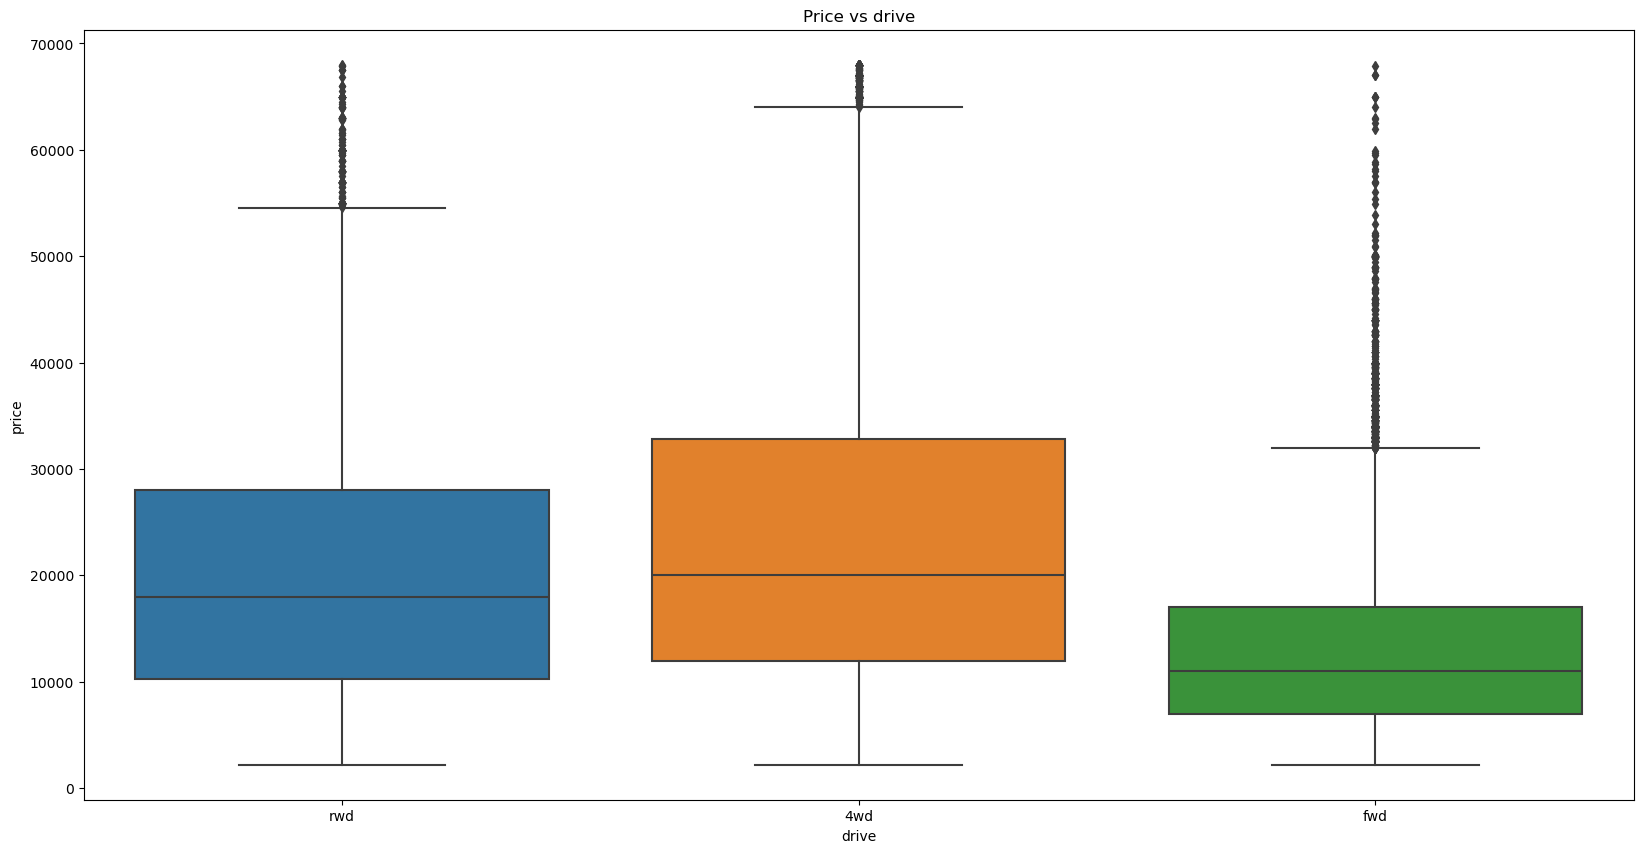

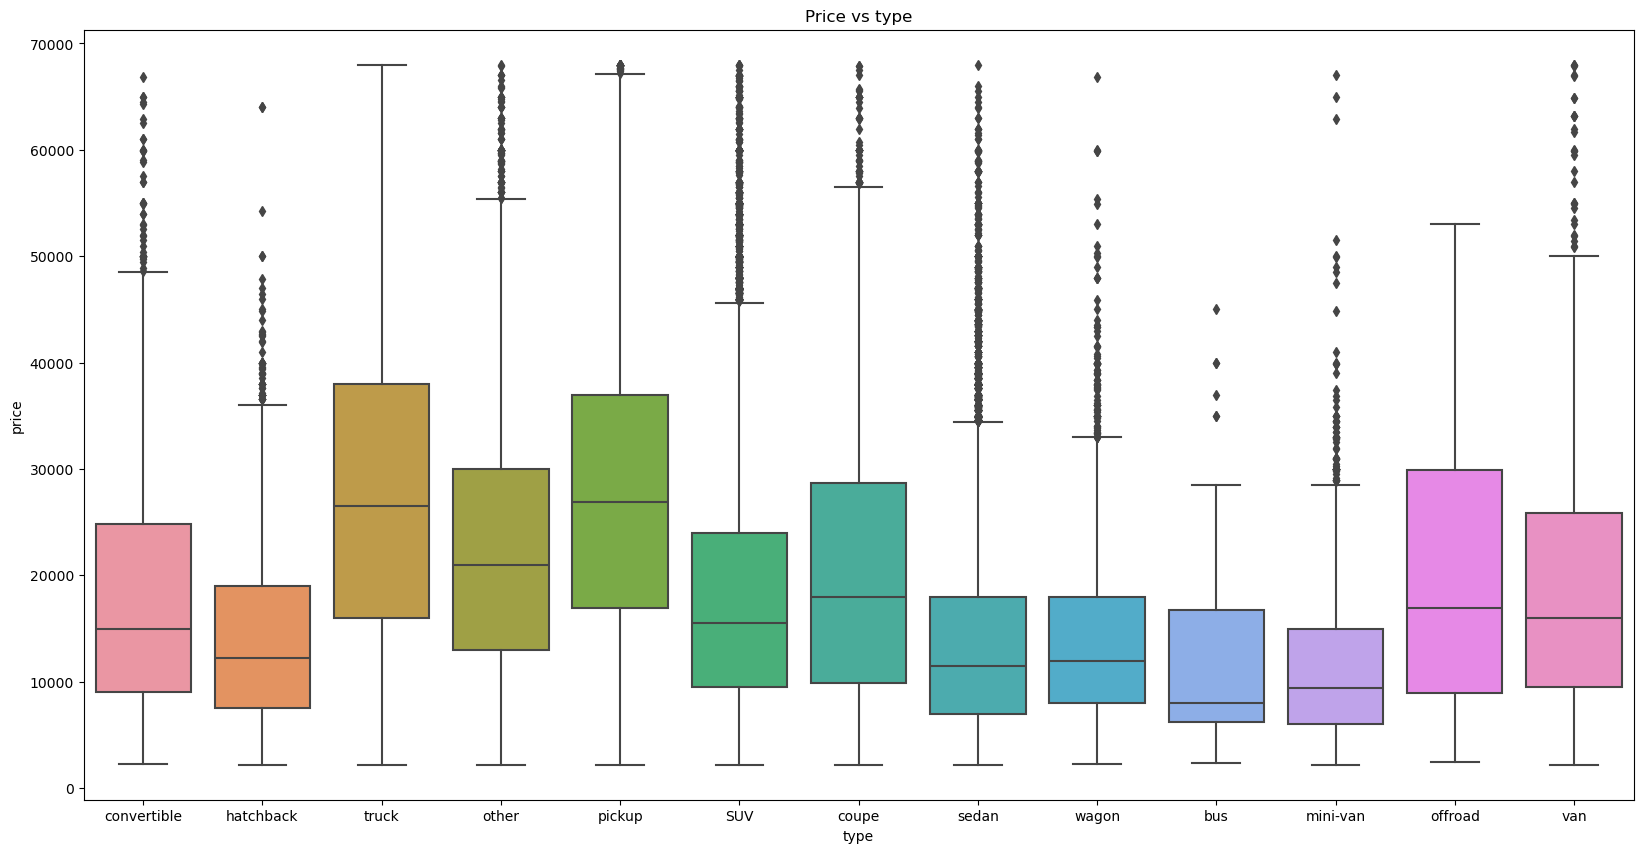

In [54]:
## It Takes too long to run; skip region and model because they have too many levels.
## Focus on condition, cylinders, fuel, title_status & Transmission

# object_columns = df.select_dtypes(include='object').columns
object_columns =['condition','cylinders','fuel','title_status',	'transmission','drive','type']
for col in object_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df, x=df[col], y=df['price'])
    plt.title("Price vs "+ col)
    plt.show()

### Insights : 
- The variable 'paint_color' is not essential for modeling the price.
- The variables condition, cylinders, fuel,	title_status,	transmission,	drive,	and type could help determine the price.
- The variable has too many levels, thus complicating the analysis; there is some overlap in the information gained by cylinders and type or fuel because bigger cars like trucks tend to have cylinders over 6 and run on diesel, so adding type may not be worth the effort.
- I will focus on the following categorical variables: 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive'

### Cleaning up the cylinders variable

In [57]:
# Extract the numeric part from the 'cylinders' column
df['cylinders_numeric'] = df['cylinders'].str.extract('(\d+)')

# Convert the extracted values to numeric type
df['cylinders_numeric'] = pd.to_numeric(df['cylinders_numeric'], errors='coerce')


#### Exploring bivariate relationships within numerical variables. 

In [59]:
corr = df.corr(numeric_only = True).round(2)

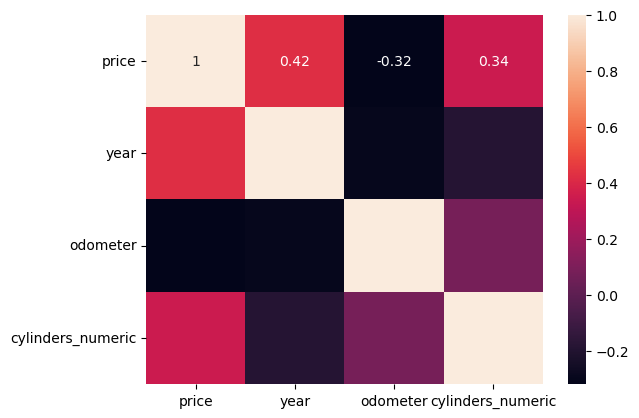

In [60]:
sns.heatmap(corr, annot = True);

##### Conclusions: 
- There is a weak positive correlation between price and year and a negative correlation between price and odometer.
- Surprisingly, the correlation between odometer and year is weak; I expected a strong correlation between them; this is likely due to the vintage old cars being highly priced despite their high odometer values.
-  There is also a weak positive correlation between cylinders_numeric and price.
-  All the observed correlation coefficients are weak to moderate ( corr coeff. < 0.5)

#### Visualizing scatter plots to see if a linear relation is appropriate

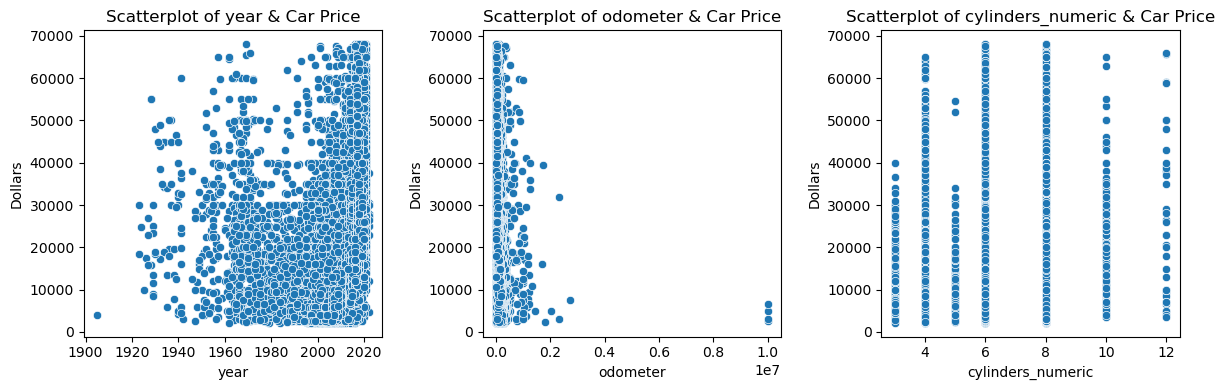

In [63]:
# Numerical variables
numerical_columns = ['year', 'odometer', 'cylinders_numeric']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=df[column], y=df['price'], ax=axes[i])
    axes[i].set_title(f'Scatterplot of {column} & Car Price')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

#### Conclusions: 
- There is a weak positive correlation between price & year. The relation between price & odometer is non-linear. -
- The price seems proportional to the 1/odometer because the response variable gets flat and close to zero for odometer values above 0.4*10^7(400K). 
- Some outliers occur after the odometer=1*e6; these might be due to classic cars with high prices despite the high odometer reading.
- There is a positive (weak) correlation between cylinder_numeric and price.


### Exploring bivariate relations between numeric variables colorded by drive and transmission 

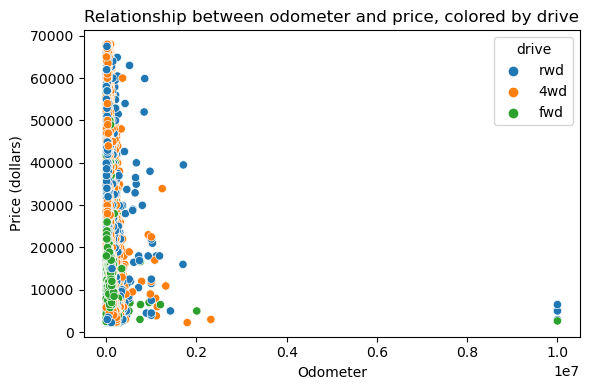

In [66]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['odometer'], y=df['price'], hue=df['drive'])

plt.title('Relationship between odometer and price, colored by drive')
plt.xlabel('Odometer')
plt.ylabel('Price (dollars)')

plt.tight_layout()
plt.show()

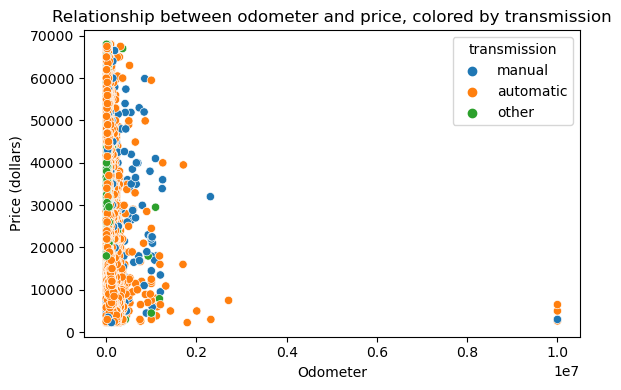

In [67]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['odometer'], y=df['price'], hue=df['transmission'])

plt.title('Relationship between odometer and price, colored by transmission')
plt.xlabel('Odometer')
plt.ylabel('Price (dollars)')

plt.tight_layout()
plt.show()

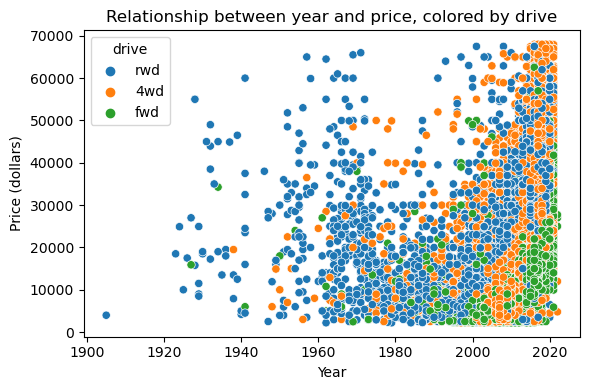

In [68]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['year'], y=df['price'], hue=df['drive'])

plt.title('Relationship between year and price, colored by drive')
plt.xlabel('Year')
plt.ylabel('Price (dollars)')

plt.tight_layout()
plt.show()

### Insights: 
- There is almost no relation between age and price for cars with Year before 1980. In cars with year after 1980, we see a positive linear relation.
- Cars with year before 1960 show very weak or negligible correlation between year and price. WE can drop those and focs on cars with year >1960.
- We can explore two different models, one for vintage very old cars and one for cars with year after say 1970 or 1980.

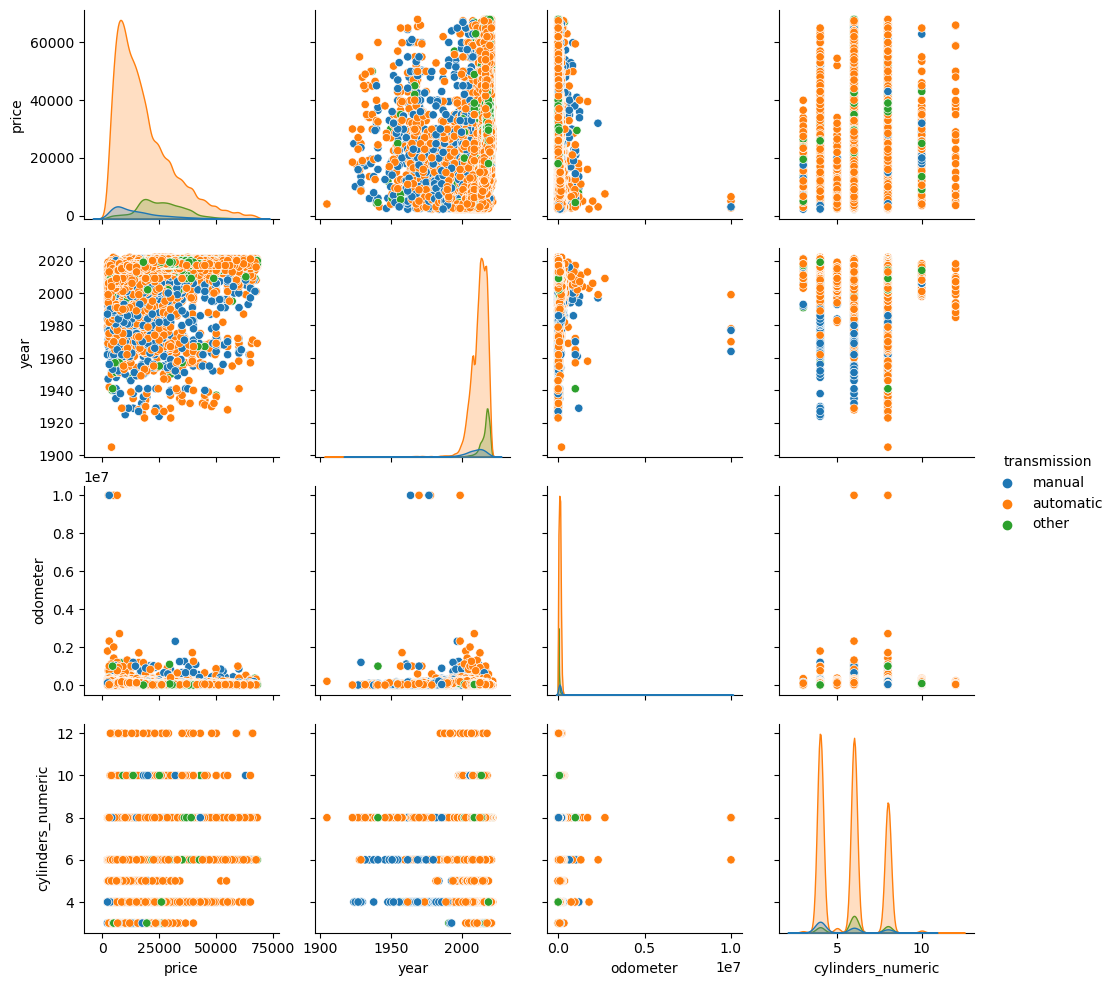

In [70]:
# Pairplot
sns.pairplot(df, hue='transmission')
plt.show()

### Conclusion:
- Automoatic cars are more expensive than manual and the relation betweem price and odometer or year is non-linear. 
- The density curve shows strong skewness in the car price, we might need to apply a log transformation to improve the model.

### Visualizing a linear relation between the numerical variables?

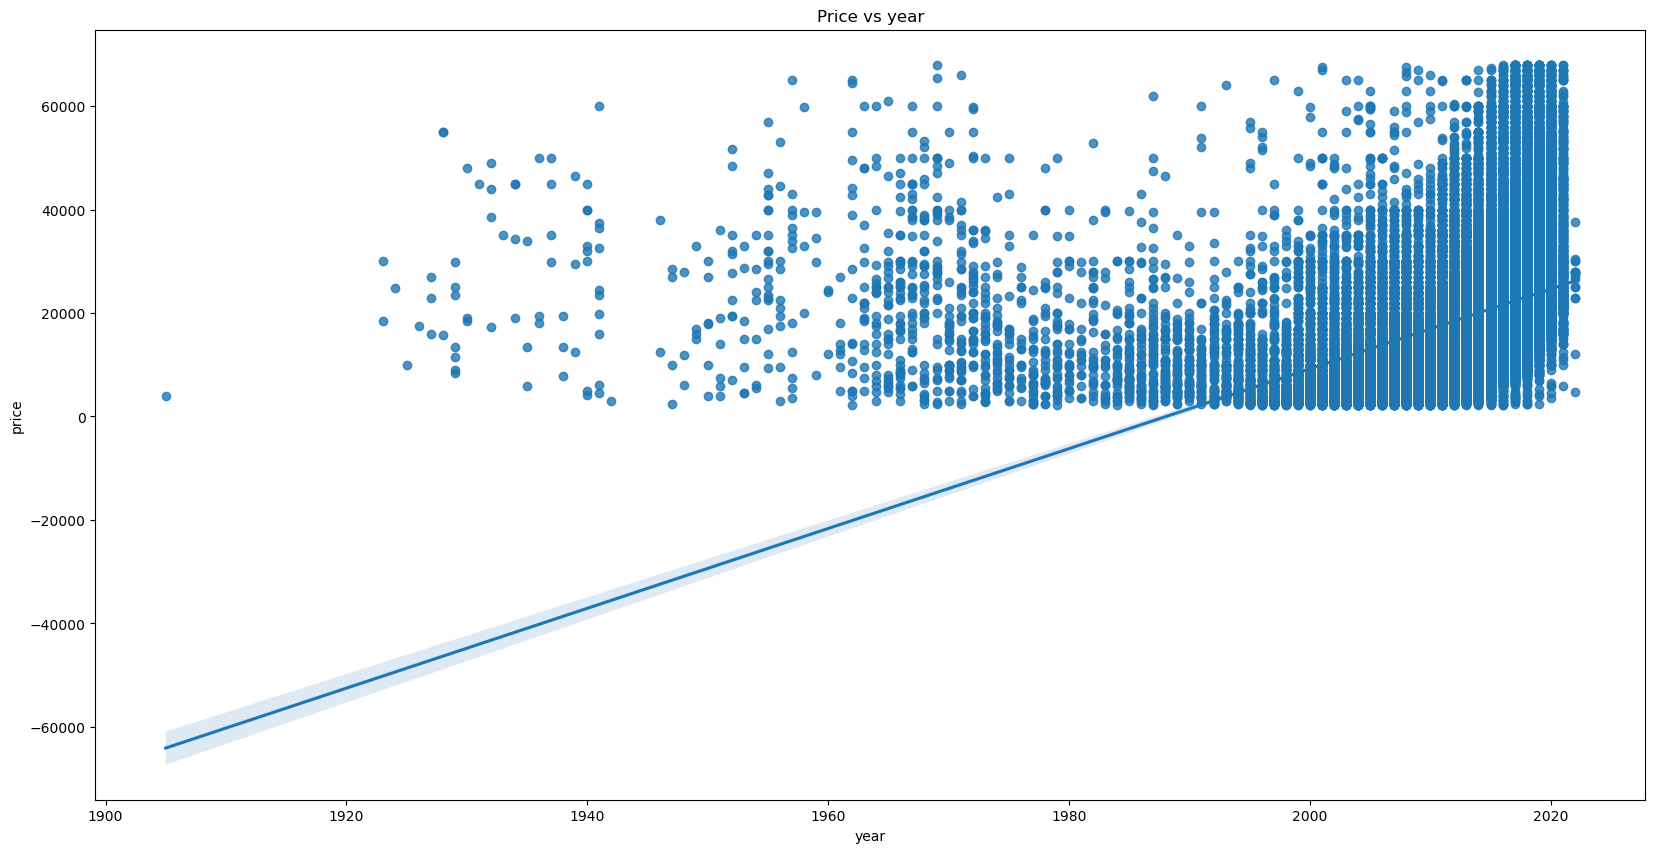

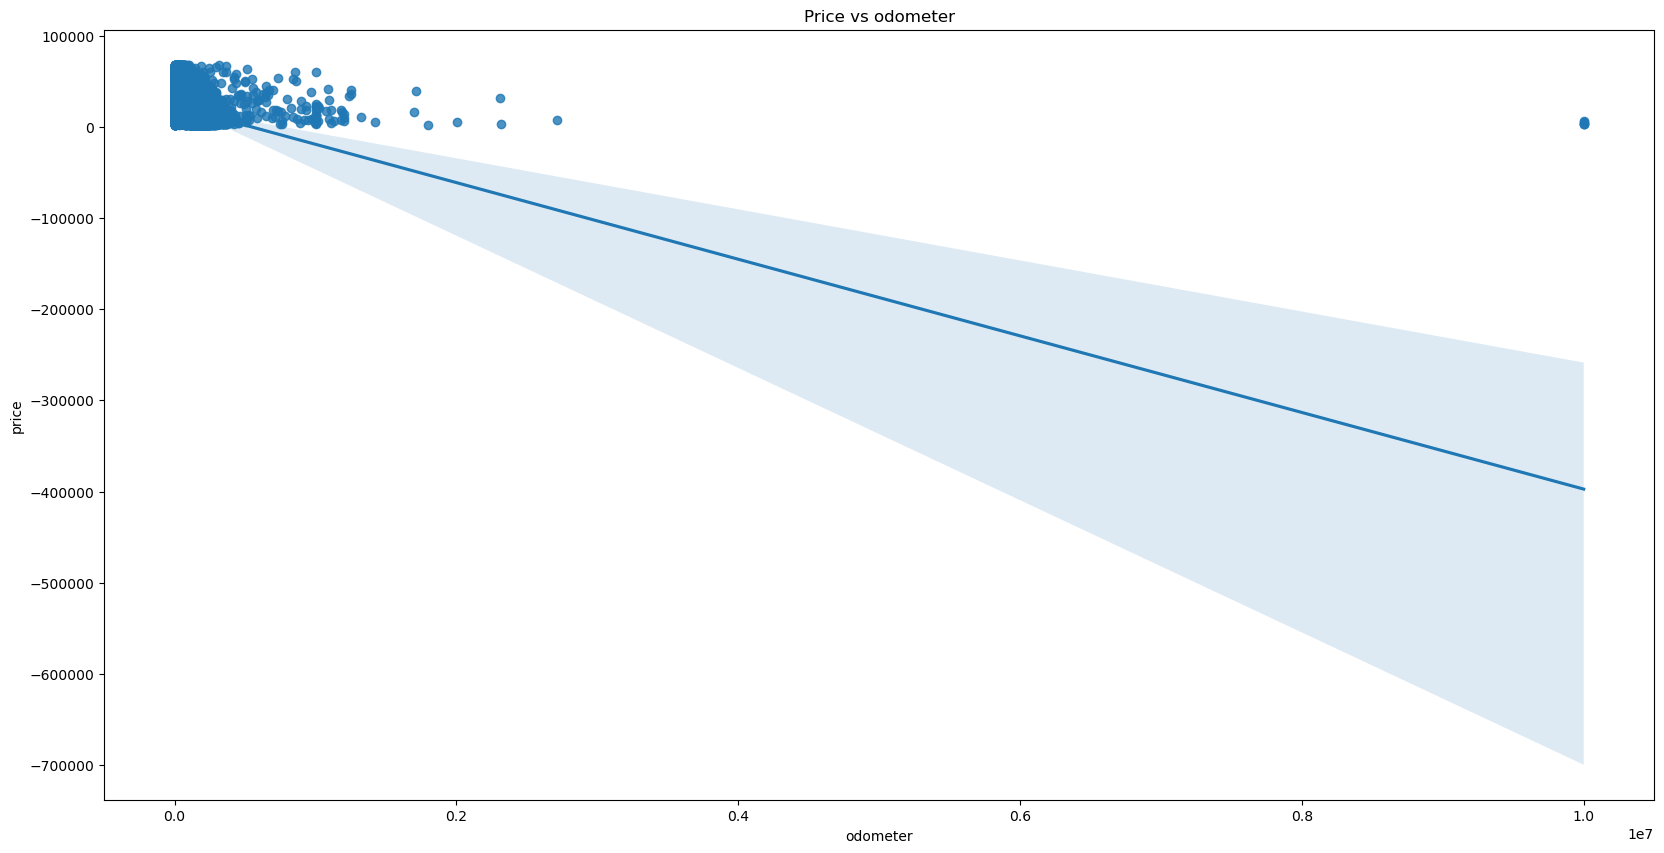

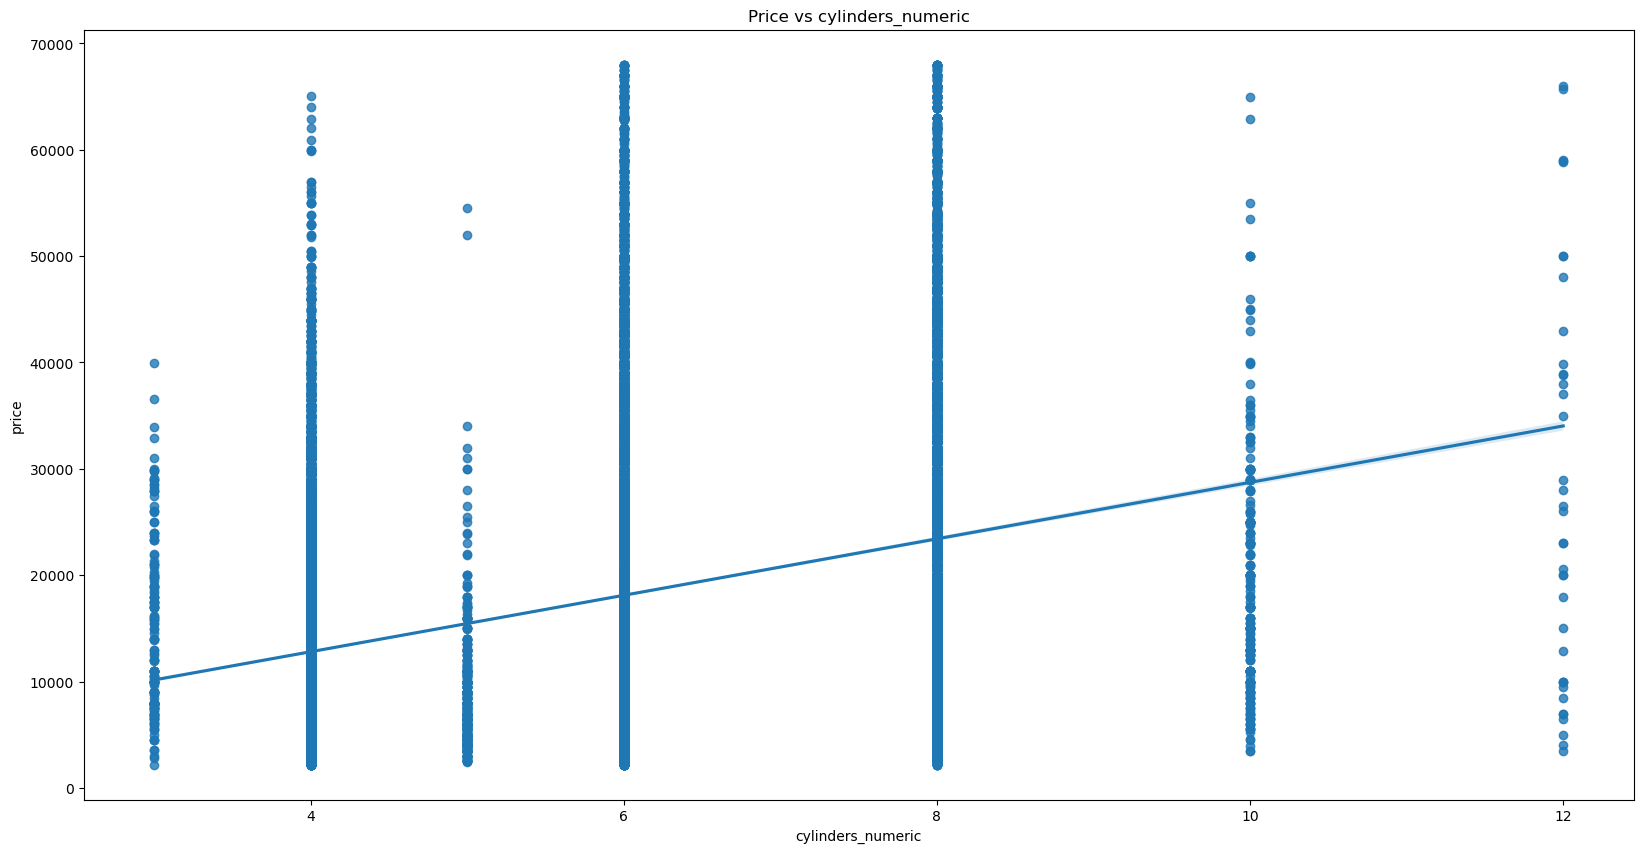

In [73]:

## Create a data frame for the predictor variables:
X=df.drop(columns='price')                  
num_columns = X.select_dtypes(include=['int64', 'float64' ]).columns

for col in num_columns:
    plt.figure(figsize=(20,10))
    sns.regplot(data=X, y=df['price'], x=X[col])
    plt.title('Price vs ' + col)
    plt.show()

#### Conclusions: 
- There is a weak linear relation between cylinders_numeric and price. 

- The relation between price and odometer or price and year is non-linear. There is a weak correlation between odometer and price for vey old cars say year <1990, the correlation gets stronger for cars with year >1990. Older cars (classic or vintage) are more desirable if they are too old, for newer cars the older they get the less valuable they are.  This suggests a nonlinear relation or a need to create an indicator for older cars and explore the need for interaction terms to allow different slopes and intercepts for vinatge and calssic cars. 

- The graph suggests that a the relation between the numeric varibales is Price ~ Exp(Year) and Price ~Exp(-odometer). Or Log(Price)~a linear combinarion of Year and odometer.
- According to an internet search: Vintage car: A car manufactured between 1919 and 1930, 
Antique car: A car manufactured in 1975 or earlie, a classic car is a vehicle manufactured in the 1990s or earlier (at least 20 years old).
- We can split the data into two sets, cars with year above 1990 Vs below 1990, thus create a separate model for cars with year less than 1990. Or we can consider a polynomical model where the older the vintage or antque car, the more expensive they are but for non-classic cars, the newer they are the more expensive. r

#### Exploring The 'type' Variable

type
sedan          24224
SUV            23092
pickup          9232
truck           7384
other           5343
hatchback       4267
coupe           3792
wagon           3344
van             2289
convertible     1724
mini-van        1333
bus              103
offroad           70
Name: count, dtype: int64

Text(0.5, 1.0, 'Sedan & SUV had the highest frequency in the dataset')

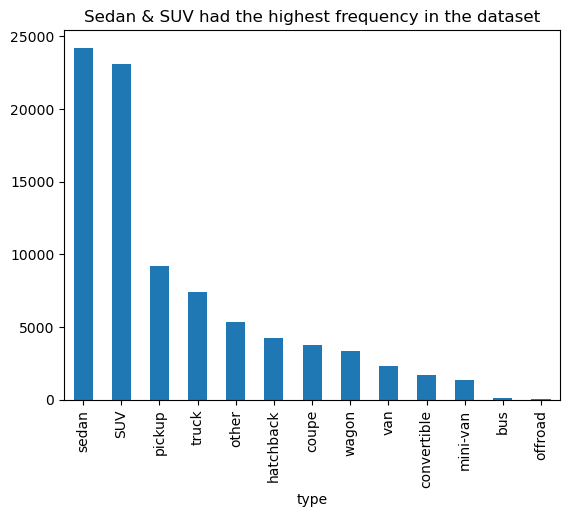

In [76]:
## Get the frequency table of the type variable

display(df['type'].value_counts())

## Creat a visualizastion of the distribution of car types
df['type'].value_counts().plot(kind = "bar");
plt.title('Sedan & SUV had the highest frequency in the dataset')


### Exploring The 'manufacturer' Variable

manufacturer
ford               15703
chevrolet          11827
toyota              8624
honda               5699
nissan              5081
jeep                4604
ram                 3770
gmc                 3564
bmw                 3550
dodge               3069
subaru              2949
hyundai             2929
mercedes-benz       2853
kia                 2471
volkswagen          2306
lexus               2066
audi                1817
cadillac            1608
chrysler            1564
mazda               1348
buick               1308
acura               1219
infiniti            1104
lincoln              857
volvo                783
mitsubishi           690
mini                 644
rover                618
pontiac              427
porsche              370
jaguar               303
saturn               225
mercury              215
fiat                 189
tesla                152
alfa-romeo           143
harley-davidson       49
datsun                10
ferrari                3
land rover  

Text(0.5, 1.0, 'Ford & Chevrolet  had the highest frequency in the dataset')

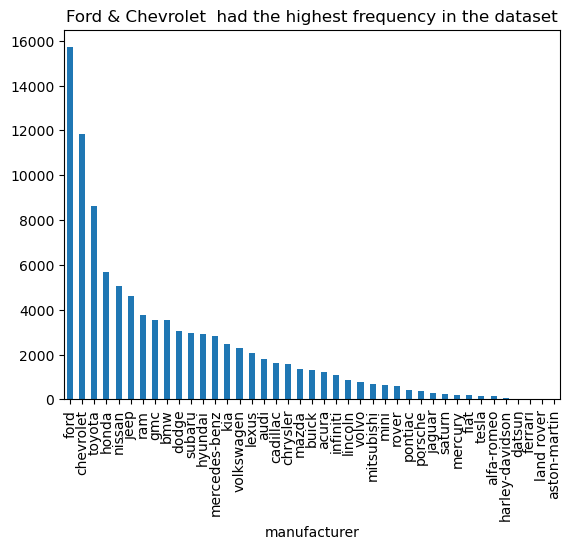

In [78]:
## Visualization of the distribution of car types
display(df['manufacturer'].value_counts())
df['manufacturer'].value_counts().plot(kind = "bar");
plt.title('Ford & Chevrolet  had the highest frequency in the dataset')


In [79]:
## Compute the mean price for each manufacturer:
df.groupby("manufacturer")["price"].mean().round(3).sort_values(ascending=False)

manufacturer
tesla              42512.184
aston-martin       37700.000
porsche            31689.111
ram                30522.660
ferrari            30045.333
rover              29685.791
alfa-romeo         29264.706
gmc                25428.132
jaguar             23173.706
audi               22245.138
mercedes-benz      21932.078
cadillac           21074.701
ford               21048.230
jeep               20821.063
bmw                20407.243
infiniti           20323.671
lexus              19713.783
chevrolet          19516.895
lincoln            18818.212
acura              18160.141
volvo              17341.307
toyota             17255.994
dodge              16932.571
datsun             16719.900
subaru             15524.332
buick              14839.351
mitsubishi         14132.180
volkswagen         14061.582
nissan             14008.042
mini               13652.266
kia                13638.639
harley-davidson    13578.367
honda              12996.044
hyundai            12765.698
m

### Insight: The following are the most valuable cars and their mean price:
- tesla : with a mean price of \$42,512.
- aston-martin : with a mean price of \$37,700.
- porsche  : with a mean price of \$31,689.
- ram : with a mean price of \$30,523.
- ferrari : with a mean price of \$30,045.

## Splitting the Data into Training and Test Sets

In [82]:
# Define your features (X) and your target variable (y)
# i DROPPED TITLE_STATUS TO SIMPLIFY MODELING 
X = df[['year', 'odometer', 'cylinders_numeric','condition',  'fuel', 'transmission', 'drive','type']]  
y = df['price']  # This is our target variable
# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,year,odometer,cylinders_numeric,condition,fuel,transmission,drive,type
232795,2017.0,106651.0,6.0,excellent,gas,automatic,4wd,truck
31974,2010.0,68950.0,6.0,excellent,gas,automatic,4wd,NaN
277090,2015.0,83895.0,4.0,excellent,gas,automatic,rwd,sedan
293526,2009.0,93469.0,6.0,excellent,gas,automatic,rwd,pickup
82501,2018.0,65854.0,NaN,NaN,NaN,automatic,fwd,hatchback


In [83]:
y_train.head()

232795    23950
31974     19996
277090    16500
293526     9500
82501     13250
Name: price, dtype: int64

In [84]:
X_test.head()

,year,odometer,cylinders_numeric,condition,fuel,transmission,drive,type
394989,2011.0,124636.0,NaN,NaN,gas,automatic,NaN,other
349126,2011.0,166841.0,6.0,like new,gas,automatic,4wd,SUV
256166,2016.0,63575.0,4.0,excellent,gas,automatic,fwd,sedan
38290,2019.0,27017.0,NaN,NaN,gas,automatic,fwd,sedan
394854,2015.0,62165.0,4.0,excellent,gas,automatic,fwd,hatchback


In [85]:
y_test.head()

394989    19995
349126    11350
256166    16249
38290     19991
394854     8200
Name: price, dtype: int64

In [86]:
print(f"Train set size: {X_train.shape}. Number of labels in the trian set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Train set size: (79492, 8). Number of labels in the trian set: (79492,)
Test set size: (19874, 8). Number of labels in the test set: (19874,)


## Feature Engineering

In [88]:
# Define numerical and categorical features
numerical_columns  = ['year', 'odometer', 'cylinders_numeric']
categorical_columns = ['condition',  'fuel',  'transmission', 'drive','type'] ## condition can be incoded as ordinal 


#### Impute Missing Data Using X_train data only to avoid data leakage

In [90]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
# Separate the numerical and categorical features in training and test sets
X_train_num = X_train[numerical_columns]
X_test_num = X_test[numerical_columns]
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]



In [91]:
# Create separate imputers
numerical_imputer = SimpleImputer(strategy='mean')  # Use mean for numerical variables
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent for categorical variables



In [92]:
# Apply imputers to each type of data
X_train_num_imputed = numerical_imputer.fit_transform(X_train_num)
X_test_num_imputed = numerical_imputer.transform(X_test_num)

X_train_cat_imputed = categorical_imputer.fit_transform(X_train_cat)
X_test_cat_imputed = categorical_imputer.transform(X_test_cat)

# Combine back into DataFrames
X_train_imputed = pd.DataFrame(X_train_num_imputed, columns=numerical_columns, index=X_train.index)
X_train_imputed[categorical_columns] = pd.DataFrame(X_train_cat_imputed, columns=categorical_columns, index=X_train.index)

X_test_imputed = pd.DataFrame(X_test_num_imputed, columns=numerical_columns, index=X_test.index)
X_test_imputed[categorical_columns] = pd.DataFrame(X_test_cat_imputed, columns=categorical_columns, index=X_test.index)

print("Missing values imputed successfully!")

Missing values imputed successfully!


In [93]:
X_test_imputed.head()

,year,odometer,cylinders_numeric,condition,fuel,transmission,drive,type
394989,2011.0,124636.0,5.731377,excellent,gas,automatic,4wd,other
349126,2011.0,166841.0,6.000000,like new,gas,automatic,4wd,SUV
256166,2016.0,63575.0,4.000000,excellent,gas,automatic,fwd,sedan
38290,2019.0,27017.0,5.731377,excellent,gas,automatic,fwd,sedan
394854,2015.0,62165.0,4.000000,excellent,gas,automatic,fwd,hatchback


In [94]:
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19874 entries, 394989 to 291427
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               19874 non-null  float64
 1   odometer           19874 non-null  float64
 2   cylinders_numeric  19874 non-null  float64
 3   condition          19874 non-null  object 
 4   fuel               19874 non-null  object 
 5   transmission       19874 non-null  object 
 6   drive              19874 non-null  object 
 7   type               19874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


In [95]:
X_train_imputed.head()

,year,odometer,cylinders_numeric,condition,fuel,transmission,drive,type
232795,2017.0,106651.0,6.000000,excellent,gas,automatic,4wd,truck
31974,2010.0,68950.0,6.000000,excellent,gas,automatic,4wd,sedan
277090,2015.0,83895.0,4.000000,excellent,gas,automatic,rwd,sedan
293526,2009.0,93469.0,6.000000,excellent,gas,automatic,rwd,pickup
82501,2018.0,65854.0,5.731377,excellent,gas,automatic,fwd,hatchback


In [96]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79492 entries, 232795 to 313246
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               79492 non-null  float64
 1   odometer           79492 non-null  float64
 2   cylinders_numeric  79492 non-null  float64
 3   condition          79492 non-null  object 
 4   fuel               79492 non-null  object 
 5   transmission       79492 non-null  object 
 6   drive              79492 non-null  object 
 7   type               79492 non-null  object 
dtypes: float64(3), object(5)
memory usage: 5.5+ MB


#### The odometer and year are on different scales; I want to standardize both before I proceed. 


In [98]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [99]:
# Create a preprocessor that applies both one-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standarize numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # One-Hot encoding for categorical features
    ])

In [100]:
X_train_processed = preprocessor.fit_transform(X_train_imputed)
X_test_processed = preprocessor.transform(X_test_imputed)

In [101]:
X_train_processed

<79492x33 sparse matrix of type '<class 'numpy.float64'>'
	with 635503 stored elements in Compressed Sparse Row format>

In [102]:
X_test_processed 

<19874x33 sparse matrix of type '<class 'numpy.float64'>'
	with 158896 stored elements in Compressed Sparse Row format>

In [103]:
# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for the categorical columns.
numerical_columns  = ['year', 'odometer', 'cylinders_numeric']
categorical_columns = ['condition',  'fuel',  'transmission', 'drive','type']

# Check the shape of the processed data
print("Shape of X_train_processed:", X_train_processed.shape)  # Check the number of columns
print("Shape of X_test_processed:", X_test_processed.shape)    # Check the number of columns

# Get the feature names for the categorical columns
name_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine numerical and categorical column names
name_all_columns = list(numerical_columns) + list(name_categorical_columns)
print(name_all_columns)
len(name_all_columns)

Shape of X_train_processed: (79492, 33)
Shape of X_test_processed: (19874, 33)
['year', 'odometer', 'cylinders_numeric', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'type_SUV', 'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon']


33

In [104]:
X_train_processed.shape

(79492, 33)

In [105]:
X_test_processed.shape

(19874, 33)

In [106]:
# Check the number of columns in the processed data
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

# Check the length of the column names list
print(f"Number of columns in name_all_columns: {len(name_all_columns)}")
print(name_all_columns)
print(type(name_all_columns))
print(type(X_train_processed))
print(type(X_test_processed))

Shape of X_train_processed: (79492, 33)
Shape of X_test_processed: (19874, 33)
Number of columns in name_all_columns: 33
['year', 'odometer', 'cylinders_numeric', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'type_SUV', 'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon']
<class 'list'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [107]:
# Convert sparse matrices to dense arrays
X_train_dense = X_train_processed.toarray()
X_test_dense = X_test_processed.toarray()

# Create DataFrames with column names
X_train_processed_df = pd.DataFrame(X_train_dense, columns=name_all_columns)
X_test_processed_df = pd.DataFrame(X_test_dense, columns=name_all_columns)

# Display the DataFrames
print(X_train_processed_df.head())
print(X_test_processed_df.head())

       year  odometer  cylinders_numeric  condition_excellent  condition_fair  \
0  0.676219  0.129758       2.187652e-01                  1.0             0.0   
1 -0.342250 -0.239477       2.187652e-01                  1.0             0.0   
2  0.385228 -0.093109      -1.410026e+00                  1.0             0.0   
3 -0.487746  0.000656       2.187652e-01                  1.0             0.0   
4  0.821714 -0.269798      -7.233285e-16                  1.0             0.0   

   condition_good  condition_like new  condition_new  condition_salvage  \
0             0.0                 0.0            0.0                0.0   
1             0.0                 0.0            0.0                0.0   
2             0.0                 0.0            0.0                0.0   
3             0.0                 0.0            0.0                0.0   
4             0.0                 0.0            0.0                0.0   

   fuel_diesel  ...  type_coupe  type_hatchback  type_mini-van

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Model 1: Muliple Linear Regression Model (MRM_model)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
MRM_model = LinearRegression()
MRM_model.fit(X_train_processed, y_train)

LinearRegression()

In [112]:
y_pred = MRM_model.predict(X_test_processed_df)

In [113]:
len(y_pred)

19874

In [114]:
y_pred[0:5]

array([18516.71860085, 17528.49506223, 13222.30448149, 19112.3462091 ,
       10084.11609727])

In [115]:
y_test.values[0:5]

array([19995, 11350, 16249, 19991,  8200], dtype=int64)

In [116]:
y_pred

array([18516.71860085, 17528.49506223, 13222.30448149, ...,
       27217.89498163, 32326.43110278, 28568.73901125])

In [117]:
len(y_test)


19874

In [118]:
len(y_pred)

19874

In [119]:
# Coefficients
coefs = MRM_model.coef_
for name, coef in zip(name_all_columns, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

Feature: year                 Coefficient: 4990.9705
Feature: odometer             Coefficient: -2608.9194
Feature: cylinders_numeric    Coefficient: 1969.7869
Feature: condition_excellent  Coefficient: 1076.4570
Feature: condition_fair       Coefficient: -1905.8154
Feature: condition_good       Coefficient: -167.2874
Feature: condition_like new   Coefficient: 2233.4317
Feature: condition_new        Coefficient: 4374.7801
Feature: condition_salvage    Coefficient: -5611.5660
Feature: fuel_diesel          Coefficient: 7792.8712
Feature: fuel_electric        Coefficient: -414.5752
Feature: fuel_gas             Coefficient: -3824.5217
Feature: fuel_hybrid          Coefficient: -2332.2078
Feature: fuel_other           Coefficient: -1221.5665
Feature: transmission_automatic Coefficient: -2380.4471
Feature: transmission_manual  Coefficient: 616.4484
Feature: transmission_other   Coefficient: 1763.9987
Feature: drive_4wd            Coefficient: 1968.6917
Feature: drive_fwd            Coeffici

In [120]:
## Obtain the y-intercept:
yintercept = MRM_model.intercept_
print(f"{yintercept:.2f}")

23229.08


In [121]:
std = df.select_dtypes(include=['number']).std().to_frame(name='Standard Deviation').rename_axis('Feature').reset_index()
std

,Feature,Standard Deviation
0,price,12513.604306
1,year,6.856646
2,odometer,95998.130953
3,cylinders_numeric,1.579786


In [122]:
# Some code to obtain the unstandarized coefficients

std_numerical = std[std['Feature'].isin(numerical_columns)]['Standard Deviation'].values

# Unstandarized coefficients for numerical columns
coefs_unstandarized_numerical = coefs[:len(numerical_columns)] / std_numerical

# Coefficients for categorical variables (no need to unstandarized)
coefs_cat = coefs[len(numerical_columns):]

# Put together
coefs_desst = np.concatenate([coefs_unstandarized_numerical, coefs_cat])

# Adjust the y-intercept so it's also unstandarized
numerical_means = preprocessor.named_transformers_['num'].mean_
yintercept_unst = yintercept - np.sum(coefs[:len(numerical_columns)] * numerical_means / std_numerical)

# Create final table
final_table = pd.DataFrame({
    'Feature': name_all_columns,
    'Standard Deviation': list(std_numerical) + ['N/A'] * len(name_categorical_columns),
    'Original Coefficients': coefs,
    'Unstandarized Coefficients': coefs_desst
})

# Add y-intercept
table_yintercept = pd.DataFrame({
    'Feature': ['y_intercpt'],
    'Standard Deviation': ['N/A'],
    'Original Coefficients': [yintercept],
    'Unstandarized Coefficients': [yintercept_unst]
})

# Put the two dfs together
final_table = pd.concat([final_table, table_yintercept], ignore_index=True)

In [123]:
final_table.sort_values('Unstandarized Coefficients', key=abs, ascending=False)

,Feature,Standard Deviation,Original Coefficients,Unstandarized Coefficients
33,y_intercpt,N/A,23229.079247,-1.446175e+06
9,fuel_diesel,N/A,7792.871197,7.792871e+03
21,type_bus,N/A,-7452.363665,-7.452364e+03
26,type_offroad,N/A,7281.889112,7.281889e+03
8,condition_salvage,N/A,-5611.566021,-5.611566e+03
24,type_hatchback,N/A,-4495.739318,-4.495739e+03
28,type_pickup,N/A,4444.995563,4.444996e+03
7,condition_new,N/A,4374.780110,4.374780e+03
30,type_truck,N/A,4297.248789,4.297249e+03
11,fuel_gas,N/A,-3824.521747,-3.824522e+03


**Interpretation of the fitted coefficients:** 
- **y-intercept:**
The expectedprice of a car ise approximately 23,2851 when all the input features are at their mean values in the dataset.

- **year:**
- For each additional year, the price of the car increases \$ 728, if all other variables are held fixed.
  
- **odometer:**
- For each additional unit in odometer, the price decreases by \$ 0.027, if all other variables are held fixed.This is surprising as we expect the milage to be an important factor here but the fact that  the relation was non-linear might explain the small coefficeint.
  
- **Cylinder_numeric:**
- For each additional unit inf cylinders_numeric, the price of the caris expected to  increass by 1,245 dollars if all other variables are held fixed. 

- For categorical variables, the fitted coewfficent shows the mean price if all other variables are at their mean value in the dataset. This is helpful at comparing the group means.
- 
- **Condition:**  

| Condition         | Feature                  | Coefficient   |
|-------------------|--------------------------|---------------|
| Salvage           | condition_salvage       | -5611.5660    |
| Fair              | condition_fair          | -1905.8154    |
| Good              | condition_good          | -167.2874     |
| Like New          | condition_like new      | 2233.4317     |
| New               | condition_new           | 4374.7801     |

-  Interpretation: The better the condoition of the price the higher the price.
 
-  **Fuel:**
-  Fuel diesel has a higher price than other types of fuel, this is likely because larger trucks run on diesel and they tend to be more expensive than other car types

- **Transmission:**
| Transmission  | Coefficient   |
|-------------------|--------------------------|
|automatic  |-2380    |
|manual   |616    |
|other |1764    |

Interpretation: - Automoartic transmissin is less expensive than manual and other. This is likely beacuase manual cars are vinatge or due to multicolinearity as the year and odometer have information about older cars with manual transmission.
 -  ***Drive*                                *- Drive type significantly affects vehicle pricing:
- 4WD vehicles add \$1969 to the baseline price.
- FWD vehicles reduce the price by \$3464.
- Vehicles with "other" drive types add \$1495 to the baseline price. and.fwd7


## Performance metrics

In [126]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
# R² (Determination coefficient)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.5060946433399428


###### $R^²=0.50$ (Coefficient of Determination):
Interpretation: $50%$ of the variation in car price can be explained by the variables in the model.
As the scatter plots indicated, the relation between the numerical variables and price is nonlinear, so we expect a poor performance for the linear model. 


In [129]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 8765.928168655879


### RMSE (Root Mean Squared Error): 
Interpretation: RMSE is a measure of the average magnitude of error between the model's predictions and the actual values. 
on average, the model is off by about $8571 when predicting car price.

In [131]:
df['price'].describe()

count    99366.000000
mean     18810.994183
std      12513.604306
min       2200.000000
25%       8995.000000
50%      15900.000000
75%      25641.750000
max      67999.000000
Name: price, dtype: float64

**RMSE (Root Mean Squared Error): 8765**

Interpretation: RMSE is a measure of the average magnitude of error between the model's predictions and the actual values. In this case, an RMSE of 8765 means that, on average, the model is off by about $8765 when predicting car price.
The interpretation of RMSE depends on the range of price values (in dollars) in your data. If the price have a wide range, an RMSE of 8765 might be acceptable. If the price values are in a smaller range, this RMSE could be considered high. Comparing this value to the average (18,810) or median (15,900) of the car prices and considering the wide range of prices and the skewness in the price, this might be acceptabe. We can improve by adding more features like the manufacturer or better yet considering non-linear models instead.

### Conclusion: 
As expected based on the scatter plots, the relation between the numerical variables and the price is non-linear. So we expect poor performance from the linear model. 

## Model 2: Polynomial with a quadratic term for Year & Odometer

#### To capture the non-linear relation between year and price and the difference between vintage/ classic cars and newer cars, we can create a quadratic year feature and explore the resulting model. 

In [136]:
## creating a quadratic year feature
X_train_processed_df['year2']=X_train_processed_df['year']**2
X_test_processed_df['year2']=X_test_processed_df['year']**2
X_train_processed_df['odometer2']=X_train_processed_df['odometer']**2
X_test_processed_df['odometer2']=X_test_processed_df['odometer']**2
X_train_processed_df.head()
X_test_processed_df.head()

,year,odometer,cylinders_numeric,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,year2,odometer2
0,-0.196755,0.305899,-7.233285e-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.038712,0.093574
1,-0.196755,0.719245,2.187652e-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038712,0.517313
2,0.530723,-0.292118,-1.410026e+00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.281667,0.085333
3,0.967210,-0.650159,-7.233285e-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.935495,0.422707
4,0.385228,-0.305928,-1.410026e+00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148400,0.093592


In [137]:
Quad_Model = LinearRegression()
Quad_Model.fit(X_train_processed, y_train)

LinearRegression()

In [138]:
y_pred=Quad_Model.fit(X_test_processed, y_test)

In [139]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = Quad_Model.predict(X_test_processed)

# Calculate the Mean Squared Error (MSE)
quad_mse = mean_squared_error(y_test, y_pred)

# R-squared
train_r2 = Quad_Model.score(X_train_processed, y_train)
test_r2 = Quad_Model.score(X_test_processed, y_test)

# Print model coefficients, intercept, and MSE
print(Quad_Model.coef_)  # Coefficients
print(Quad_Model.intercept_)  # Intercept
print(f"Mean Squared Error (MSE): {quad_mse}")  # MSE

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Print the results
print(f"Train R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

[  3941.66742678  -7965.63205105   1930.57576603    946.76825229
  -1790.89236565    131.37449676   1669.57092018   5055.01253183
  -6011.83383541   8304.87370771    378.2456844   -4367.87712106
  -1942.00422923  -2373.23804182  -1338.23087548   1137.55040281
    200.68047266   2087.16343487  -3396.69329544   1309.5298605
   -452.69348819 -10790.50414405   1902.24439101   1703.79132461
  -4391.06725453   -636.09098458   5440.62349469   1197.98811824
   5513.13767625  -1834.0791242    4751.72418084     25.6985999
  -2430.77278997]
22423.516034339726
Mean Squared Error (MSE): 68024295.30140892
RMSE: 8247.684238706579
Train R-squared: 0.31
Test R-squared: 0.56


**Conclusion:**  
- The quadratic model offers a modest improvement with $RMSE= 8248$ compared to the linear model with $RMSE=8765$.
- No noticable improvement in $R^2=56\%$ compared to linear model $R^2=50.6\%$.

### Model 3: Lasso Model with Degree 2 Polynomial

In [142]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define the pipeline
ols_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])

# Fit the pipeline on the training data
Lasso_model = ols_pipe.fit(X_train_processed, y_train)

# Make predictions
ols_preds_train = ols_pipe.predict(X_train_processed)
ols_preds_test = ols_pipe.predict(X_test_processed)

# Answer check
print(ols_pipe)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())])


In [143]:
# Calculate R-squared
r2 = r2_score(y_test, ols_preds_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, ols_preds_test))

# Print results
print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.6948
Root Mean Squared Error (RMSE): 6891.1804


In [144]:
# R² (Determination coefficient)
r2 = r2_score(y_test, ols_preds_test)
print(f'R²: {r2}')

R²: 0.694764416652226


**Conclusion:**
- The second degree Lasso model improves $R^2=69.5\%$ and $RMSE=6891$.
- The model explains nearly $70\%$ of the variability in the car price.

#### Model 4: Ridge Regression with Degree =3

In [147]:
ridge_low_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias= False)), 
                     ('ridge_low', Ridge(alpha = 0.1))])
ridge_low_pipe.fit(X_train_processed, y_train)
ridge_low_preds = ridge_low_pipe.predict(X_train_processed)


# Answer check
ridge_low_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge_low', Ridge(alpha=0.1))])

In [148]:
alphas = [0.1, 1.0, 10.0, 100.0]
coef_list = [] 

In [149]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train_processed, y_train)
    coef_list.append(list(ridge.coef_))
    
print('For alpha = 100 we have the following coefficients:')
list(zip(X_train.columns, coef_list[-1]))

For alpha = 100 we have the following coefficients:


[('year', 4986.178581511751),
 ('odometer', -2613.938920505861),
 ('cylinders_numeric', 1981.9666970560277),
 ('condition', 333.5812726394346),
 ('fuel', -2084.2258551547734),
 ('transmission', -898.7955432659071),
 ('drive', 1459.9854980852206),
 ('type', 2340.0336957405475)]

In [150]:
from sklearn.metrics import mean_absolute_error
Rdg_Mdl = Ridge().fit(X_train_processed, y_train)
Rdg_Mdl_coefs = Rdg_Mdl.coef_
print(f'Ridge Coefs: {np.round(Rdg_Mdl_coefs, 2)}')
print(f"Ridge Model Summary:")
# Get coefficients and intercept
Rdg_Mdl_coefs = Rdg_Mdl.coef_
Rdg_Mdl_intercept = Rdg_Mdl.intercept_

# Scoring the model
train_score = Rdg_Mdl.score(X_train_processed, y_train)  # R-squared for training data
test_score = Rdg_Mdl.score(X_test_processed, y_test)    # R-squared for testing data

# Additional metrics
y_train_pred = Rdg_Mdl.predict(X_train_processed)
y_test_pred = Rdg_Mdl.predict(X_test_processed)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Summary
print(f"Train R-squared: {train_score:.2f}")
print(f"Test R-squared: {test_score:.2f}")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Intercept: {Rdg_Mdl_intercept:.2f}")
print(f"Coefficients: {np.round(Rdg_Mdl_coefs, 2)}")

Ridge Coefs: [ 4991.74 -2609.21  1970.27   890.32 -2099.03  -352.88  2040.91  4147.84
 -4627.16  7800.1   -466.29 -3814.18 -2309.25 -1210.39 -2379.77   617.
  1762.77  1968.53 -3463.6   1495.07 -1314.1  -7266.24  3192.71  2217.6
 -4538.79 -2558.74  7588.82   183.23  4399.62 -2091.63  4251.57  -273.98
 -3790.1 ]
Ridge Model Summary:
Train R-squared: 0.48
Test R-squared: 0.51
Train MSE: 81927012.39, Test MSE: 76846318.96
Train MAE: 6258.35, Test MAE: 6197.94
Intercept: 23448.29
Coefficients: [ 4991.74 -2609.21  1970.27   890.32 -2099.03  -352.88  2040.91  4147.84
 -4627.16  7800.1   -466.29 -3814.18 -2309.25 -1210.39 -2379.77   617.
  1762.77  1968.53 -3463.6   1495.07 -1314.1  -7266.24  3192.71  2217.6
 -4538.79 -2558.74  7588.82   183.23  4399.62 -2091.63  4251.57  -273.98
 -3790.1 ]


#### Interpretation:
Ridge regression results in $R^2=51\%$ not much of an improvement & $MAE: 6198$.

##### Insights: 
- Lasso Model with Degree 2 Polynomial provideds the best fit with $R^2=69.5\%$ and $RMSE=6891$. 
- Ridge Model has a smaller MAE than Lasso but also smaller $R^2$. 

### Using GridSearchCV to find the best ploynomial degree and $\alpha$

**Note:** The GridsearchCV algorithm took too long to converge, so I applied it to a random sample of size 10,000 from the data to speed up processing. 

In [155]:
# Convert sparse matrix to dense for checking missing values
# Create a random sample of the dataset
import numpy as np
import pandas as pd

# Define sample size
sample_size = 10000

# Convert sparse matrix to dense format and then to DataFrame (if needed for sampling)
X_train_dense = X_train_processed.toarray()  # Converts sparse matrix to dense NumPy array
X_train_df = pd.DataFrame(X_train_dense)     # Convert dense array to DataFrame for sampling
X_test_dense = X_train_processed.toarray()  # Converts sparse matrix to dense NumPy array
X_test_df = pd.DataFrame(X_test_dense)  
# Create random sample of the dataset
X_train_sample = X_train_df.sample(n=sample_size, random_state=42)
y_train_sample = y_train.sample(n=sample_size, random_state=42)

# Check for missing values in X_train_sample
print("Missing values in X_train_sample:", np.isnan(X_train_sample).sum().sum())

# Check for missing values in y_train_sample
print("Missing values in y_train_sample:", y_train_sample.isnull().sum())

# Check the type and shape of the data
print(f"Type of X_train_sample: {type(X_train_sample)}, Shape: {X_train_sample.shape}")
print(f"Type of y_train_sample: {type(y_train_sample)}, Shape: {y_train_sample.shape}")


Missing values in X_train_sample: 0
Missing values in y_train_sample: 0
Type of X_train_sample: <class 'pandas.core.frame.DataFrame'>, Shape: (10000, 33)
Type of y_train_sample: <class 'pandas.core.series.Series'>, Shape: (10000,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Define the pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scale', StandardScaler()),
    ('model', Lasso())
])

# Define the parameter grid
param_grid = {
    'model__alpha': [0.1, 1, 10, 100],  
    'poly__degree': [1, 2, 3]          
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the sample of size 10,000 from the training data
grid_search.fit(X_train_sample, y_train_sample)

# Get the best model
best_model = grid_search.best_estimator_
print(best_model)
grid_search.best_params_
# Verify the polynomial degree of the best model
print("Polynomial Degree:", best_model.named_steps['poly'].degree)

**Interpretation of the GridSearchCV Output:**
- Strong regularization (alpha=100) implies the dataset might have noisy features or multicollinearity.
- The best model has degree=2 with interaction terms. 

In [ ]:
# Extract the Lasso model from the best pipeline
lasso_model = best_model.named_steps['model']

# Get the coefficients and intercept
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

# get the feature names
feature_names = best_model.named_steps['poly'].get_feature_names_out()

# Combine feature names and coefficients into a DataFrame for better readability
import pandas as pd
coef_summary = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the intercept and coefficient summary
print("Intercept:", intercept)
print(coef_summary)

In [ ]:
# Coefficients
coefs = lasso_model.coef_
for name, coef in zip(name_all_columns, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

In [ ]:
# Filter out zero coefficients
non_zero_coefficients = coef_summary[coef_summary['Coefficient'] != 0]
print(non_zero_coefficients)

In [ ]:
# Verify the polynomial degree of the best model
print("Polynomial Degree:", best_model.named_steps['poly'].degree)

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test_df)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

### Summary of Conclusions \& Recommendations:
**For Inventory Management:**
o	Focus on acquiring newer vehicles with lower mileage, as consumers value these more.
o	Highlight features like engine size and specific makes/models in marketing campaigns.

**For Pricing Strategies:**
o	Use the predictive model to price vehicles based on mileage, age, and other vital attributes.
o	Adjust pricing strategies based on region-specific demand and feature preferences.
o	The “best” fitted model provides a reliable mechanism for predicting vehicle prices.
o	Understanding mileage, vehicle age, and categorical attributes can guide pricing decisions.
o	Cleaning and encoding categorical features significantly enhanced model accuracy.

•	My models focused on cars below the 90th percentile for the price. Cars in the top 10th percentile tier based on descriptive statistics have the following attributes: \
**region:** The most frequent was Seattle-Tacoma.\
**price:** Range from 68,000- 200,142 dollars.\
**Year:** varied from 1932 to 2021.0, with a median of 2019.\
**Manufacturer:** Ford accounted for 352 of the 1178 cars, making it the most popular manufacturer. The Corvette manufactures accounted for 41 of the 1178 cars, making it the most popular model.\
**Condition:** excellent accounted for 231 of the 1178 cars\
**Cylinders:** 8 cylinders accounted for 426\
**Fuel:** diesel accounted for 532\
**Odometer:** Ranged from 0 (brand new cars) to 640,626 with a mean of roughly 26,000.\
**State:**  California had the most expensive cars, and diesel is the most popular fuel among those.

 


### Possible Enhancements:
- Creating a new feature to allow for different slopes and intercepts for older (vintage, classic and antique cars) compared to other car types.
- Add the manufacturer variable.
- Consider applying a log transformation to the price variable thus fitting an exponential model in a linear combination of the features.
- Dropping all outliers might also enhance the model accuracy. 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Evaluation Function:

In [ ]:
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    errors = {}
    
    # Errors for train data
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)
    
    # Errors for test data
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)
    
    return errors

model_evaluation = []

I computed the evaluation metrics of each of the fitted models above, so this part is no longer needed here. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
 import pandas as pd

def predict_car_price(car, pipeline):
    """
    Function to predict the price of a car using a trained pipeline.

    Parameters:
    - car (dict): Dictionary with the characteristics of the car.
    - pipeline: Trained pipeline (includes preprocessing and the best model).

    Returns:
    - float: Predicted price of the car.
    """
    # Create a DataFrame with the new car's data
    car_df = pd.DataFrame([car])

    # Make the prediction using the trained pipeline
    prediction = pipeline.predict(car_df)

    return prediction[0]

# Example of a new car's features
new_car = {
    'year': 2013,
    'type': 'sedan',
    'odometer': 45000,
    'manufacturer': 'toyota',
    'transmission': 'automatic',
    'fuel': 'gas'
}

# Assuming `best_model` refers to the trained pipeline from GridSearchCV
prediction = predict_car_price(new_car, best_model)

print(f'The predicted price of the new car: ${prediction:.2f}')
